EDA on User Descriptive Data

## Connect to Drive

In [1]:
# no need to do so as this is local running
# from google.colab import drive
# drive.mount('/content/drive')

## Imports and Preliminary Functions

### Installation

In [2]:
!pip install plotly cufflinks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=False)
import plotly.io as pio 

In [2]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
# pio.renderers.default = "notebook" # should change by looking into pio.renderers
pio.renderers.default = 'pdf'
    
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

sns.set(rc={'figure.figsize':(40, 20),
           })
plt.rc("figure", figsize=(16,8))
warnings.filterwarnings('ignore')

def bar_plot(data, title="Bar Plot", xax=None,yax=None, hue=None, bar_label=True):
    fig, ax = plt.subplots(figsize = (50, 30))   
    fig = sns.barplot(x = xax, y = yax, data = data, 
                 ci = None, ax=ax, hue=hue)
    if hue is None:
        #fig = data.plot(kind="bar")
        fig.bar_label(fig.containers[0], fontsize=35)
        # fig.set_xticklabels(data[xax].astype(str).to_list(), rotation=80, fontsize=40)    
    else:
        plt.legend(fontsize=40)
        plt.xticks(fontsize=40, rotation=80)
    if bar_label:
        [fig.bar_label(fig.containers[i], fontsize=50) for i in range(len(fig.containers))]
    plt.yticks(fontsize=40)
    plt.title(title, fontsize=50)
    plt.xlabel(xax, fontsize=50)
    plt.ylabel(yax, fontsize=50)
    plt.show()

# Creating a function for univariate analysis
def uni(df,col,v,hue =None):

    sns.set(style="darkgrid")
    
    if v == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0], color="#da0463")
        # plt.yscale('log')
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile", color="#f85959")
        # plt.yscale('log')
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v', color="#d89cf6")
        # plt.yscale('log')
    
    if v == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, color="#4CB391", order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

In [4]:
df = pd.read_csv("Users_Descriptives.csv")
df.columns = df.columns.str.lower()
df.head()

id        city               state        country gender  \
0   38940   Bydgoszcz  Kujawsko-Pomorskie         Poland   male   
1  168107  Marysville                Ohio  United States   male   
2  168124    Chaville       Île-de-France         France   male   
3      13     Raleigh      North Carolina  United States   male   
4  168141      Denver            Colorado  United States   male   

   profile_length  activitymonthlyduration  highagreement  lowagreement  \
0            44.0                    12.53            387            68   
1             4.0                     9.80             77             3   
2             3.0                    10.53             55             2   
3           179.0                    12.79           5212           210   
4             1.0                     1.72              0             0   

   views    fame  questions  answers  comments   edits  tokens  
0   2641   24175      302.0     52.0     479.0  1046.0   422.0  
1    153    1089        1.0     32.0      84.0    40.0    23.0  
2     52     743       12.0      6.0      10.0    44.0    23.0  
3  42264  206112       10.0   2134.0    3870.0  3842.0   832.0  
4     19     123        4.0      NaN       2.0    12.0     7.0

Attribute meaning:

* Id: refers to the identification code of a particular user
* City: refers to the city of the user
* State: refers to the state of a user
* Country: refers to the country
* Gender: refers to the sex of the user
* Profile_length: refer to the total number of words a user wrote about themselves in their profile
* ActivityMonthlyDuration: refers to the total number of months a user has been on the platform.
* HighAgreement: Represents the total number of agreements a user has on topics
* LowAgreement: Represents the total number of disagreements a user has on topics
* Views: Represents the total number of views a user profile accumulated through their lifetime
* Fame: Represent the entire fame a user accumulated through their lifetime 
* Questions: Represents the total number of questions a user asked
* Answers: Represent the total number of solutions a user provided
* Comments: Represents the total number of comments a user provided
* Edits: Represents the total number of amendments or changes a user carried out on a particular process
* Tokens: Represents the total number of tokens or incentives a user gained through participation in various processes


### Check if Plotly is Showing Plots

In [5]:
df.profile_length.iplot(kind="hist")


KeyboardInterrupt



## Check Missing Data

In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
mdf = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
mdf = mdf.reset_index()
mdf

index    Total   Percent
0                   answers  2715863  0.724697
1                  comments  2570735  0.685971
2                 questions  2450360  0.653851
3                     edits  2127569  0.567718
4            profile_length  2092586  0.558383
5                    tokens  1530237  0.408326
6                     state  1180775  0.315076
7                      city  1089133  0.290623
8                    gender   704106  0.187883
9                   country     1439  0.000384
10                     fame        0  0.000000
11                    views        0  0.000000
12             lowagreement        0  0.000000
13            highagreement        0  0.000000
14  activitymonthlyduration        0  0.000000
15                       id        0  0.000000

In [9]:
mdf.query("Total>1000").iplot(kind="pie", labels="index", values="Total")

### Insights
There seems to be high percentage of Answers missing and then Comments, Edits and so on. Lets take columns that are missing more than 1000 times.

## Univariate Analysis

### Profile Length

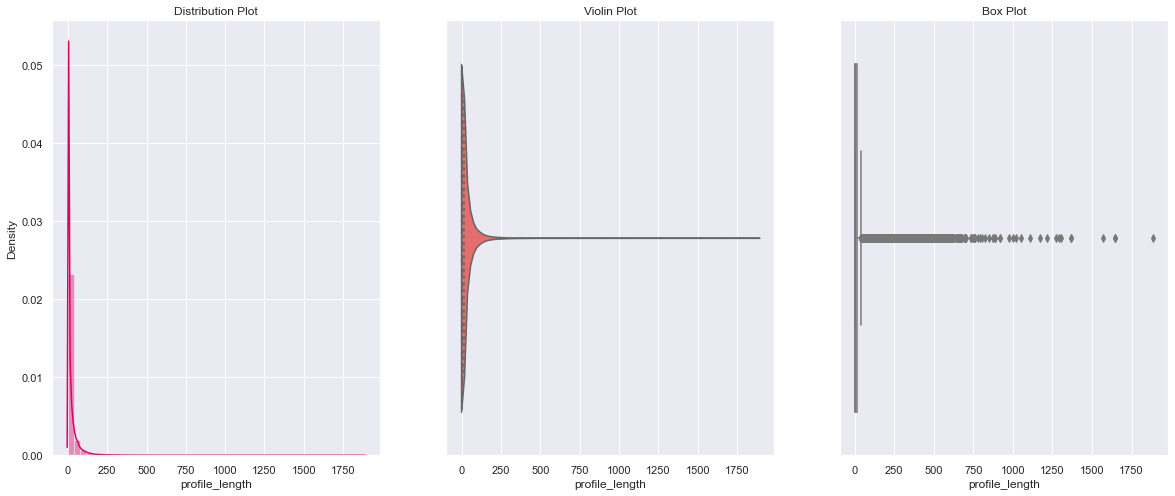

In [10]:
uni(df, "profile_length",v=0)

#### Insights
* Profile length seems to be highly skwed towards the left side and most of the lengths is below 250. Which means that most people have written small bio.

### Activity Monthly Duration

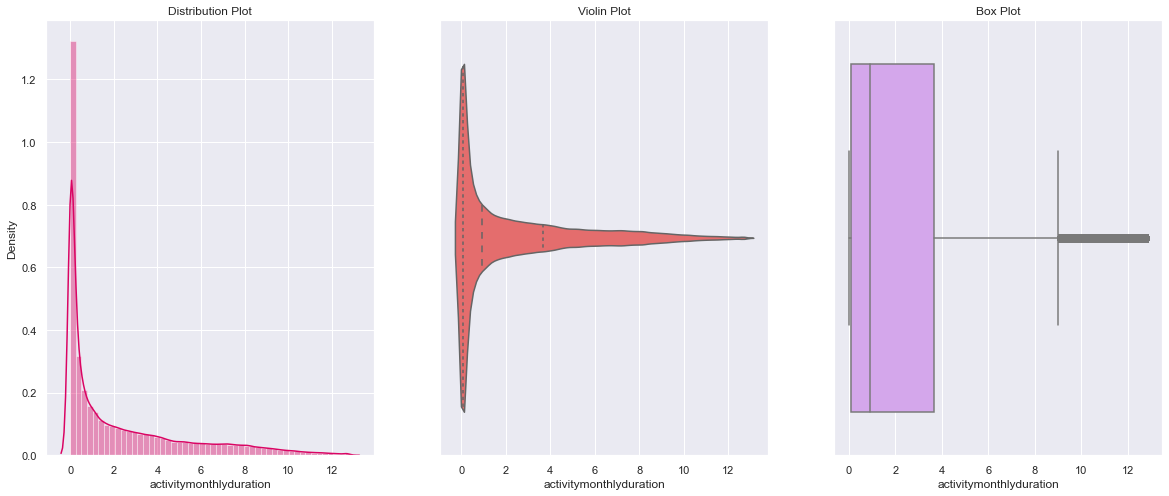

In [11]:
uni(df, "activitymonthlyduration",v=0)

#### Insights
* 


### High Agreement

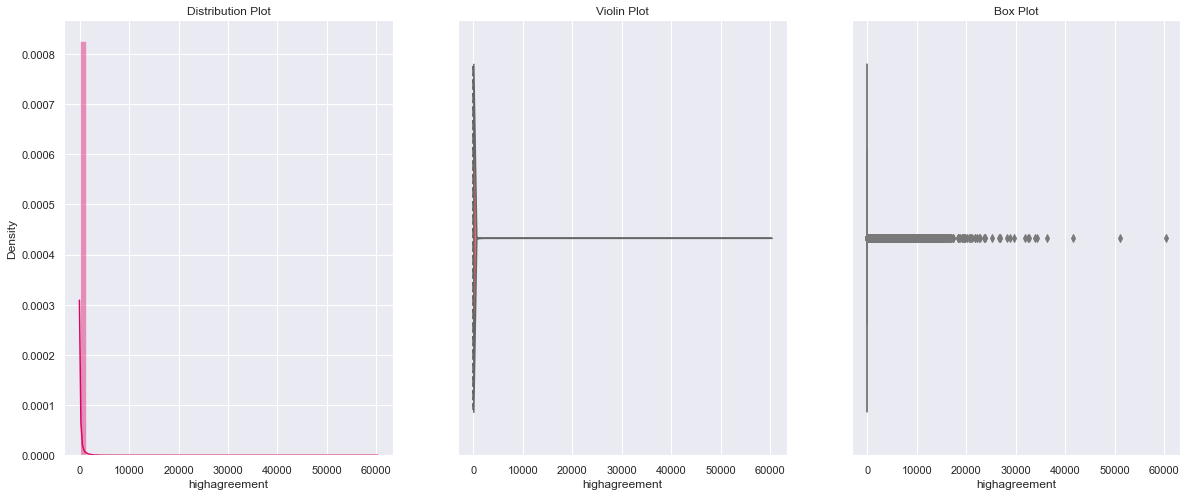

In [12]:
uni(df, "highagreement",v=0)

#### Insights
* Highly skweded towards 0 and lots of outliers.

### Low Agreement

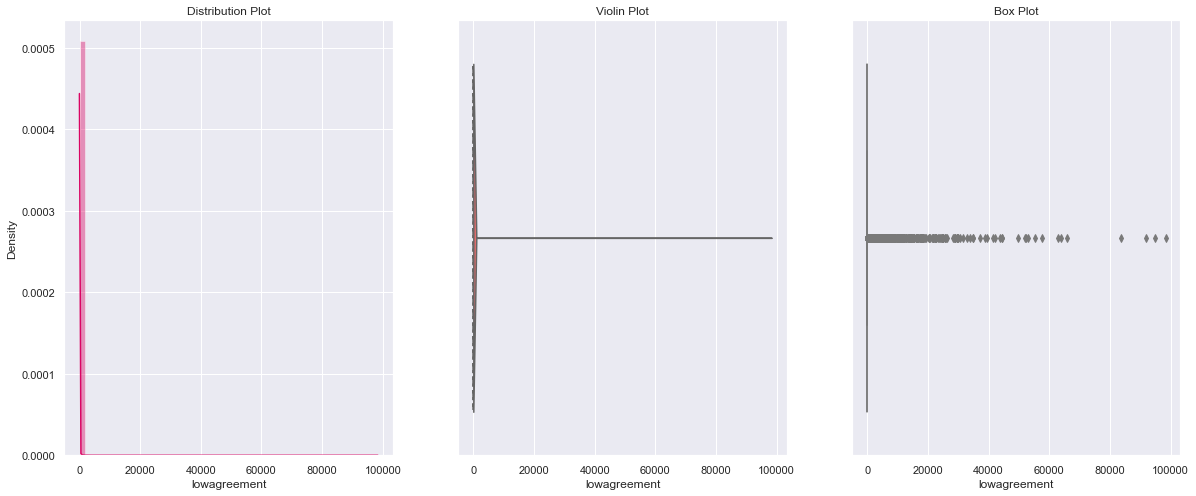

In [13]:
uni(df, "lowagreement",v=0)

#### Insights
* Highly skweded towards 0.

### Views

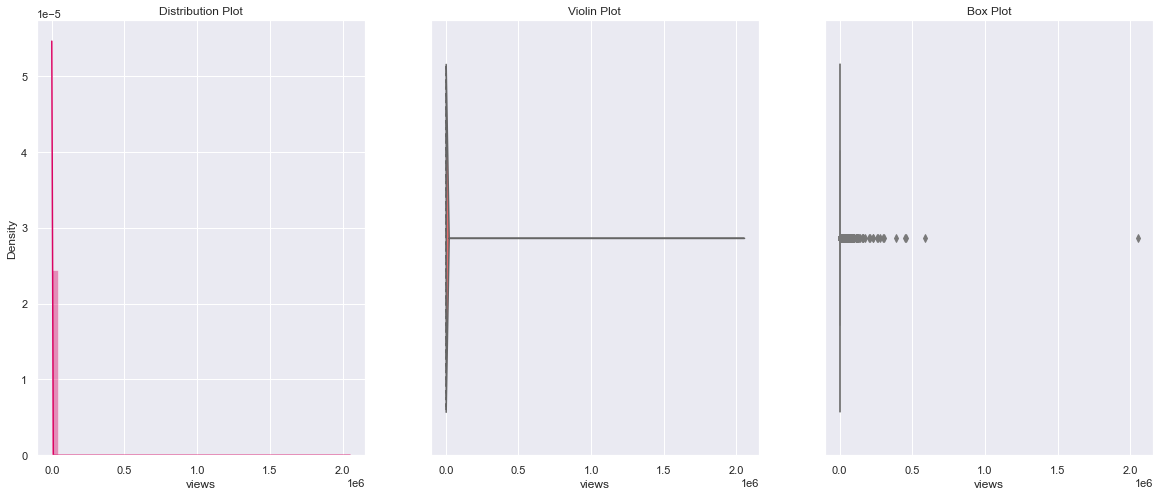

In [14]:
uni(df, "views",v=0)

#### Insights
* Highly skweded towards 0. 

### Fame

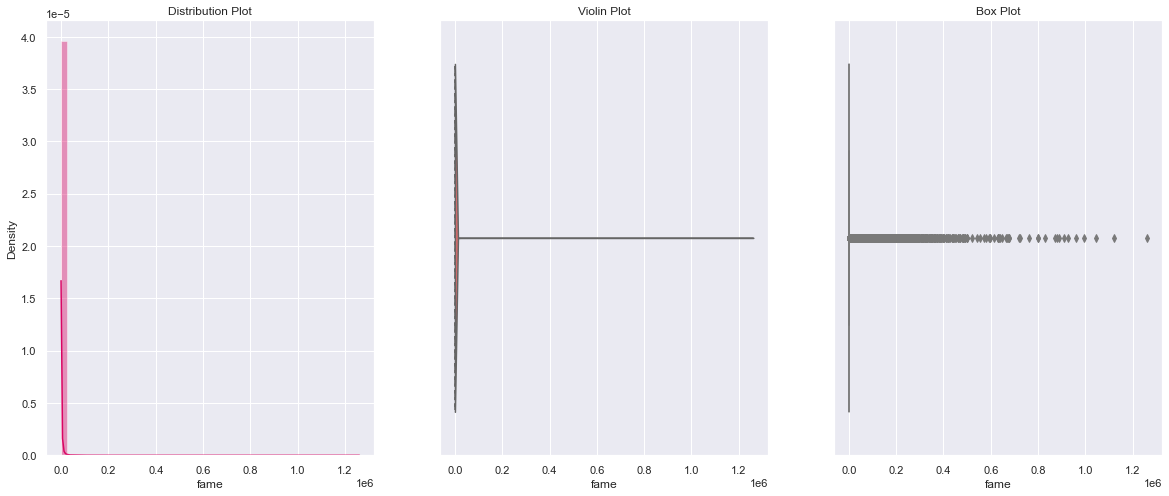

In [15]:
uni(df, "fame",v=0)

#### Insights
* Highly skweded towards 0.

### Questions

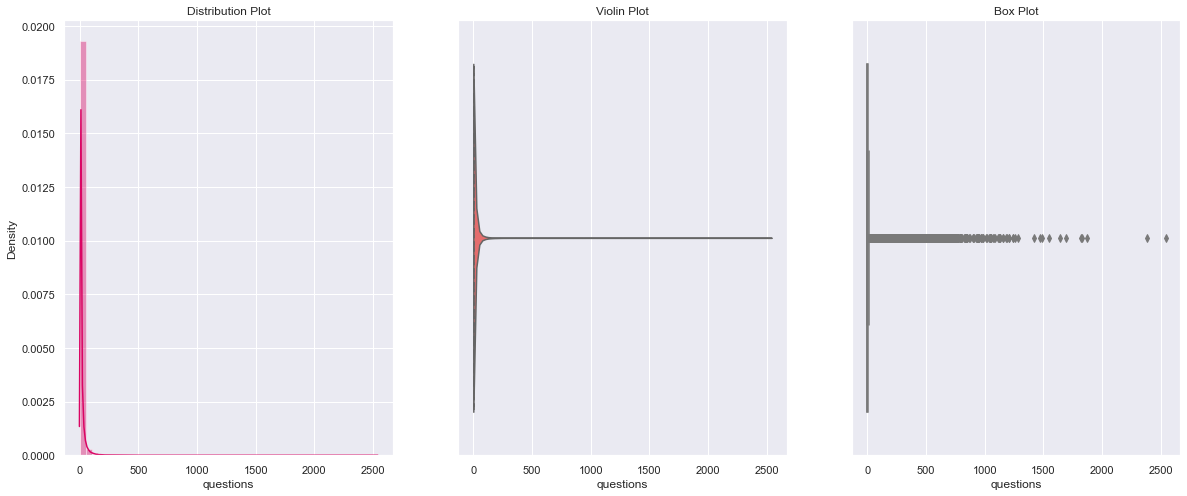

In [16]:
uni(df, "questions",v=0)

#### Insights
* Highly skweded towards 0.

### Answers

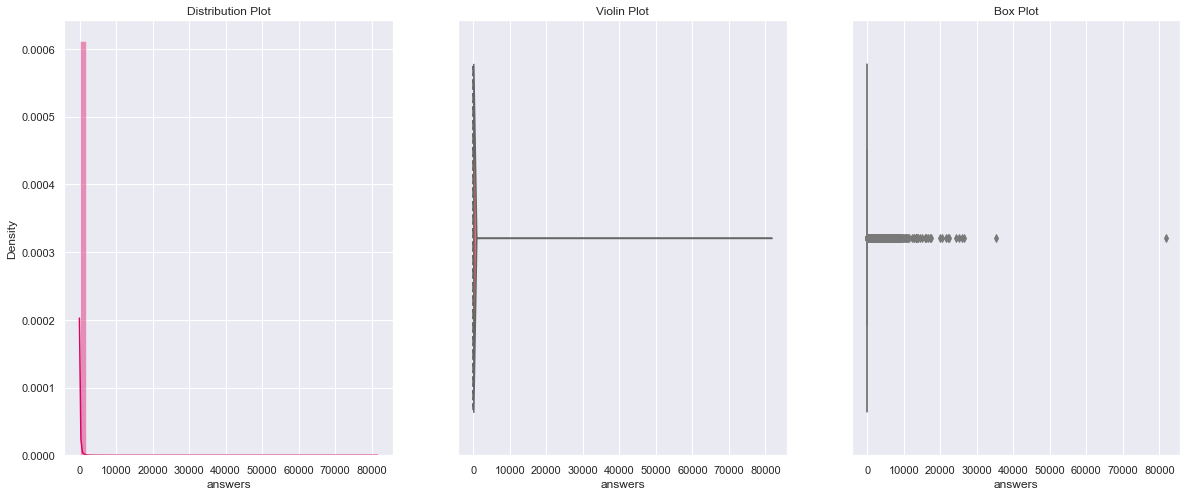

In [17]:
uni(df, "answers",v=0)

#### Insights
* Highly skweded towards 0.

### Comments

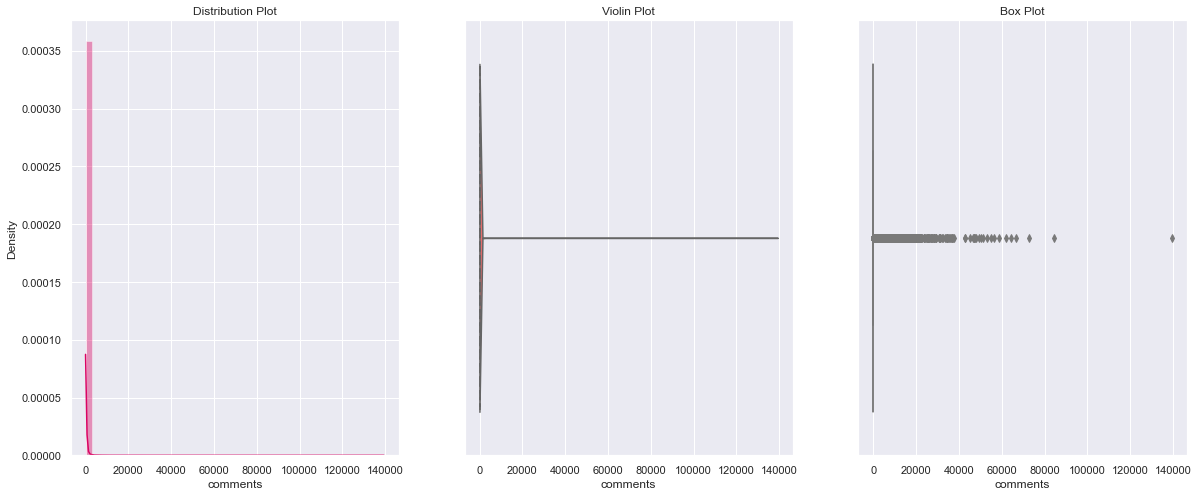

In [18]:
uni(df, "comments",v=0)

#### Insights
* Highly skweded towards 0.

### Edits

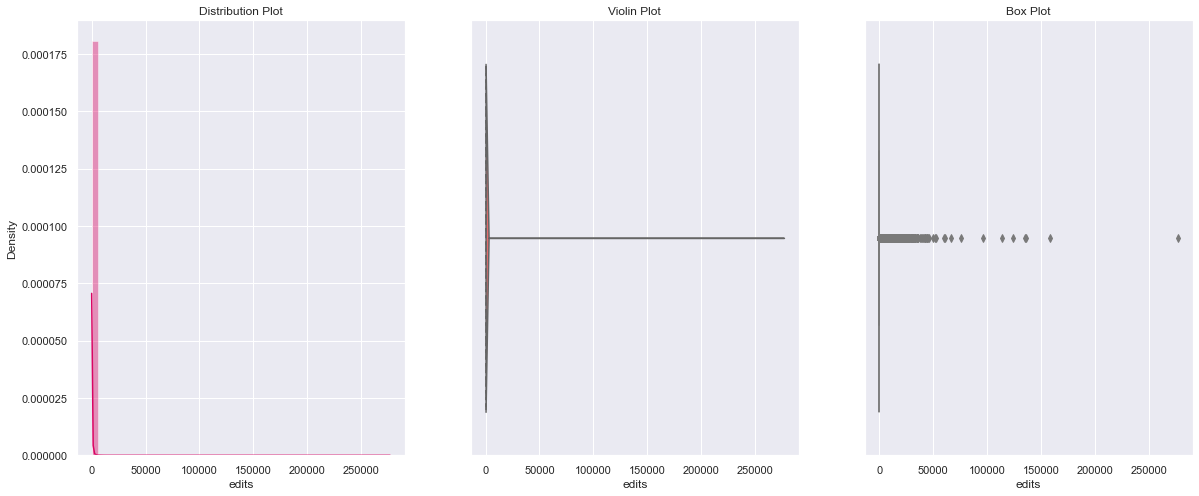

In [19]:
uni(df, "edits",v=0)

#### Insights
* Highly skweded towards 0.

### Tokens

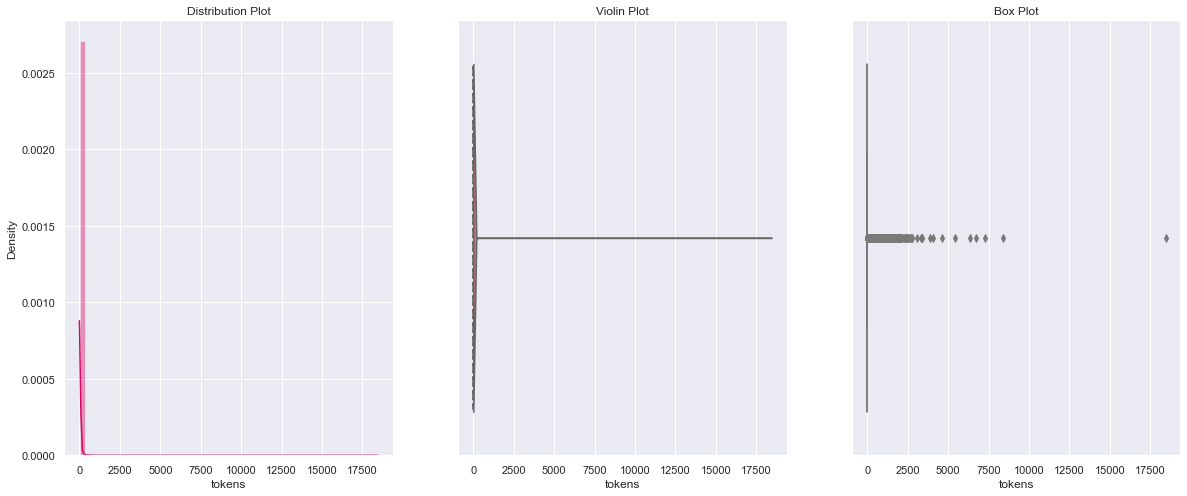

In [20]:
uni(df, "tokens",v=0)

#### Insights
* Highly skweded towards 0.

## Correlations between Columns

<AxesSubplot:>

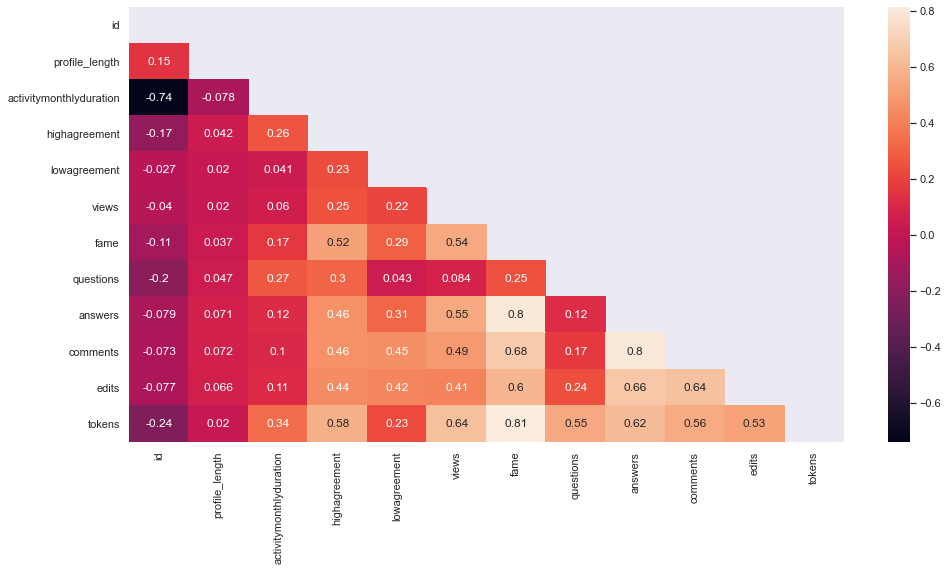

In [21]:
corr = df[[c for c in df.columns if c != "Id"]].corr()
mask = np.triu(corr)

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        mask = mask, annot=True)

In [22]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "8pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '15pt'})\
    .set_caption("Correlation Table")\
    .set_precision(2)\
    .set_table_styles(magnify())

limit_output extension: Maximum message size of 10000 exceeded with 38706 characters

### Insights
#### Profile Length
* Negative correlation with ActivityMonthlyDuration, it seems that as profile length increases, acitvity slowly decreases per month.
* The strongest relationship is with Answers, Comments and Edits. As profile length increases these also increases.

#### ActivityMonthly Duration
* Strong relationship with Tokens, Questions and HighAgreement.

#### HighAgreement
* Strong Relationship with Tokens, Fame and so on. It seems that as the HighAgreement increases, Fame also increases.

#### LowAgreement
* It seems low agreement have some position relationship with comments. Does it mean they tend to comment more?

#### Views
* It seems that as Views increases, so does the tokens, Fame, answers and comments.

#### Fame
* It seems that as Fame increases, so does answers and tokens.


## Prepare Latitude/Longitude

For map plots later on.

In [23]:
# !wget https://github.com/beoutbreakprepared/nCoV2019/raw/master/latest_data/latestdata.tar.gz
# !tar -xvf  'latestdata.tar.gz' -C '/content/'
# ldf = pd.read_csv("/content/latestdata.csv")
# ldf.head()

# lldf = ldf[["city", "province", "country", "latitude", "longitude"]]
# lldf = lldf.drop_duplicates(subset = ["city", "province", "country"])
# lldf.columns = ["City", "State", "Country", "Latitude", "Longitude"]
# lldf

In [24]:
# lldf["address"] = lldf["City"].fillna("") + "#" + lldf["State"].fillna("")+"#"+lldf["Country"].fillna("")

## EDA Based on City
Takes too much time thus not running now.

In [25]:
# def match_place(p):
#   if type(p) == str:
#     p = p.lower()
#     city,state,country=p.split("#")
    
#     nlldf = lldf #[~lldf.City.isna()]
#     res = nlldf[nlldf.address.str.lower().str.contains(city)]
#     if len(res)>0 and len(city)>1:
#       return res["Latitude"].tolist()[0], res["Longitude"].tolist()[0]
    
#     res = nlldf[nlldf.address.str.lower().str.contains(state)]
#     if len(res)>0 and len(state)>1:
#       return res["Latitude"].tolist()[0], res["Longitude"].tolist()[0]

#     res = nlldf[nlldf.address.str.lower().str.contains(country)]
#     if len(res)>0 and len(country)>1:
#       return res["Latitude"].mean(), res["Longitude"].mean()
    
      

# tdf = df
# tdf["place"] = tdf["City"] + "#" + tdf["State"]+"#"+tdf["Country"]
# tdf["lon_lat"] = tdf.place.apply(match_place)
# tdf["Lat"] = tdf.lon_lat.apply(lambda x: x if not x else x[0])
# tdf["Long"] = tdf.lon_lat.apply(lambda x: x if not x else x[1])
# tdf["place"] = tdf["City"] + ", " + tdf["State"]+", "+tdf["Country"]

# tdf.set_index("place", inplace=True)

In [26]:
# import plotly.express as px

# fig = px.density_mapbox(tdf, 
#                         lat="Lat", 
#                         lon="Long", 
#                         hover_name="place", 
#                         hover_data=["Views"], 
#                         color_continuous_scale="Portland",
#                         radius=7, 
#                         zoom=0,height=700)
# fig.update_layout(title='Place vs views',
#                   font=dict(family="Courier New, monospace",
#                             size=18,
#                             color="#7f7f7f")
#                  )
# fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


# fig.show()

In [27]:
!pip install wordcloud

## EDA According to the country

### Country WordCloud

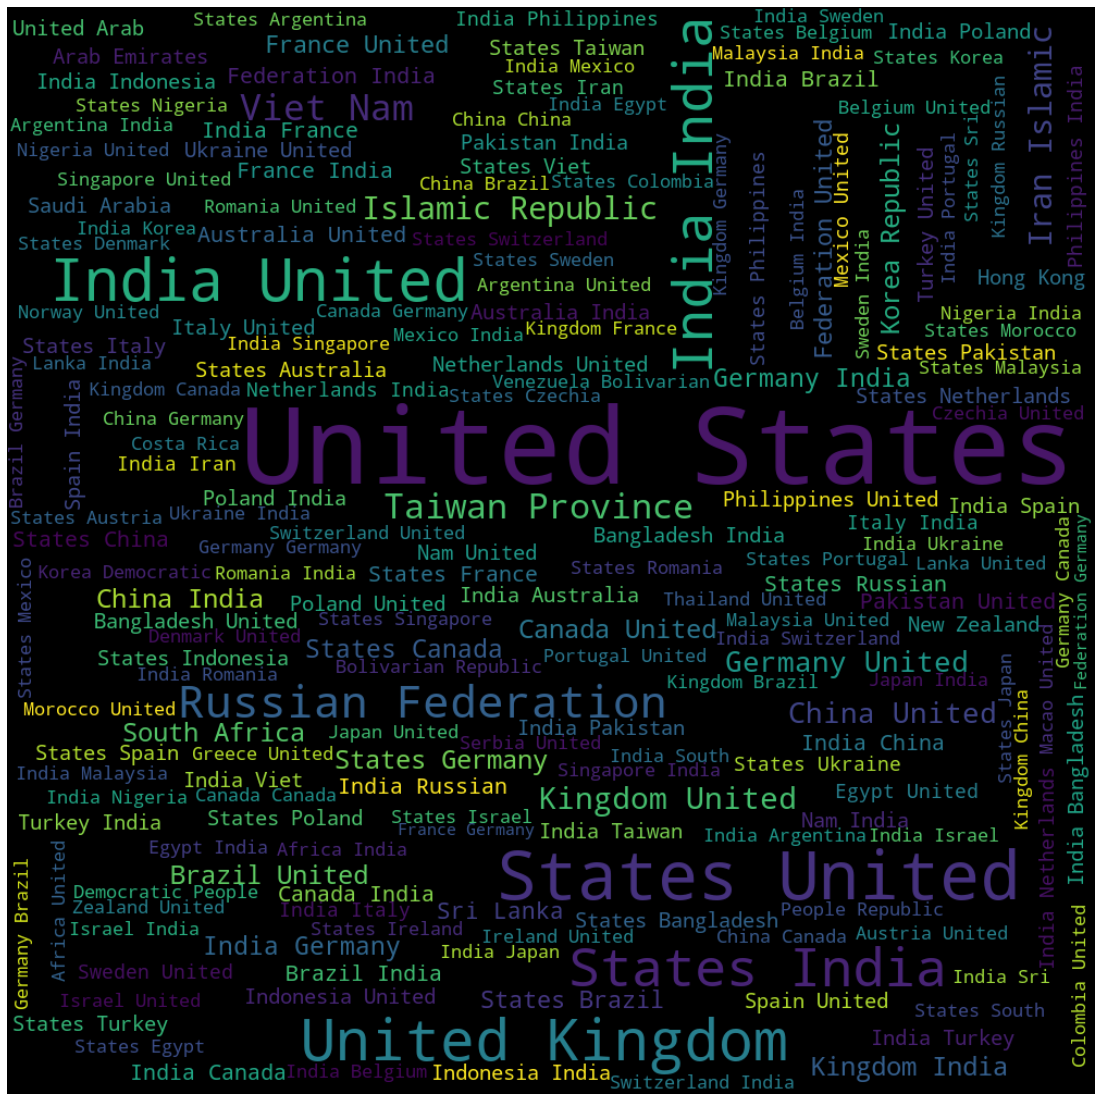

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000, background_color='black', min_font_size=3).generate(" ".join(df.country.dropna().tolist()))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Insights
* Us is most repeated then India.

### State World Cloud

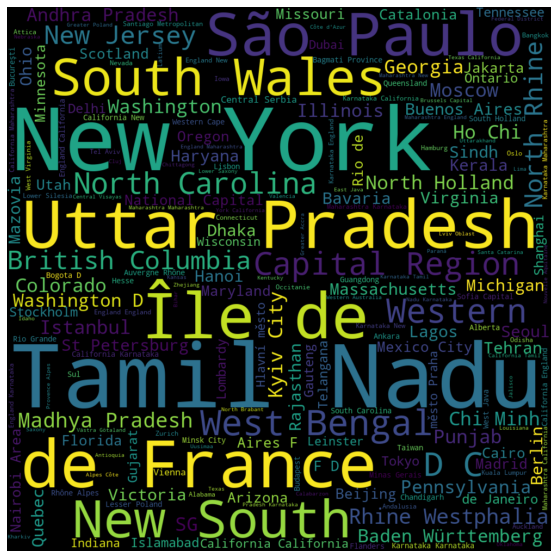

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000, background_color='black', min_font_size=3).generate(" ".join(df.state.dropna().tolist()))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Insights
* States from US and India is on top.

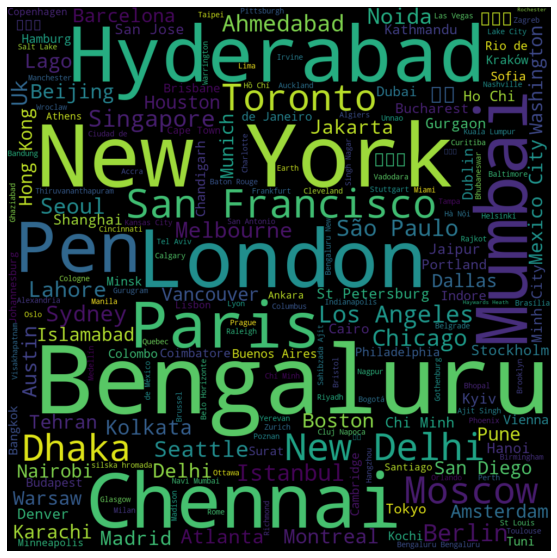

In [30]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000, background_color='black', min_font_size=3).generate(" ".join(df.city.dropna().tolist()))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Prepare Country Aggregated DF

> Here, female ratio is the proportion of the female profiles from that country.

In [31]:
def value_counts(x):
  """
    Returns ratio of females. 
  """
  v = x.value_counts(normalize=True).rename("gratio").reset_index().sort_values("index")
  fr = v.query("index=='female'")["gratio"]

  if len(fr)>0:
    return fr
  else:
    return 0

df_con = df.groupby("country").aggregate(
    no_profiles=("id", "count"),
    avg_profile_len = ("profile_length", "mean"),
    std_profile_len = ("profile_length", "std"),
    female_ratio = ("gender", value_counts),
    avg_monthly_duration = ("activitymonthlyduration", "mean"),
    total_monthly_duration = ("activitymonthlyduration", "sum"),
    std_monthly_duration = ("activitymonthlyduration", "std"),
    avg_high_agreement = ("highagreement", "mean"),
    avg_low_agreement = ("lowagreement", "mean"),
    avg_views = ("views", "mean"),
    total_views = ("views", "sum"),
    std_views = ("views", "std"),
    avg_questions = ("questions", "mean"),
    std_questions = ("questions", "std"),
    total_questions = ("questions", "sum"),
    avg_answers = ("answers", "mean"),
    std_answers = ("answers", "std"),
    total_answers = ("answers", "sum"),
    avg_comments = ("comments", "mean"),
    std_comments = ("comments", "std"),
    total_comments = ("comments", "sum"),
    total_tokens = ("tokens", "sum"),
    avg_tokens = ("tokens", "mean"),
    std_tokens = ("tokens", "std")
    ).reset_index()


df_con

country  no_profiles  avg_profile_len  std_profile_len  \
0          Afghanistan         1695        11.750413        31.472981   
1              Albania         1338        15.770492        40.320642   
2              Algeria         8999        12.880404        27.416959   
3       American Samoa           50         9.533333        14.574276   
4              Andorra          103        23.448980        49.687801   
..                 ...          ...              ...              ...   
240  Wallis and Futuna            1              NaN              NaN   
241     Western Sahara           14         9.750000        14.361407   
242              Yemen          995        12.871795        48.533362   
243             Zambia         1149        13.719101        21.623046   
244           Zimbabwe         2261        13.816807        26.168099   

     female_ratio  avg_monthly_duration  total_monthly_duration  \
0        0.132120              1.338478                 2268.72   
1        0.243421              1.804656                 2414.63   
2        0.185085              1.210008                10888.86   
3        0.179487              1.208000                   60.40   
4        0.182927              2.546408                  262.28   
..            ...                   ...                     ...   
240      0.000000              0.090000                    0.09   
241      0.000000              0.695000                    9.73   
242      0.121387              1.216794                 1210.71   
243      0.189119              1.190339                 1367.70   
244      0.186522              1.394126                 3152.12   

     std_monthly_duration  avg_high_agreement  avg_low_agreement  avg_views  \
0                1.912375           11.532153           0.532153  11.776401   
1                2.261245           11.335575           1.454410  20.439462   
2                1.804947           10.217913           0.985332  10.758084   
3                2.095799            0.600000           0.000000   3.220000   
4                2.933439           31.417476           1.058252  77.291262   
..                    ...                 ...                ...        ...   
240                   NaN            0.000000           0.000000   0.000000   
241              1.165377            1.214286           0.000000   1.571429   
242              1.904603            9.305528           0.253266   7.074372   
243              1.904995            9.320279           0.153177   4.891210   
244              1.969983            3.060150           0.218045   4.176913   

     total_views   std_views  avg_questions  std_questions  total_questions  \
0          19961   54.836099       6.039666      12.900832           2893.0   
1          27348  134.247340       4.786842       6.449670           1819.0   
2          96812  142.697696       4.240872       9.184246           8363.0   
3            161    8.212211       3.166667       2.757909             38.0   
4           7961  425.226944       7.833333      10.672318            329.0   
..           ...         ...            ...            ...              ...   
240            0         NaN            NaN            NaN              0.0   
241           22    3.030976       3.500000       0.707107              7.0   
242         7039   31.099252       4.203704       8.173422            908.0   
243         5620   58.160922       4.246231       8.580850            845.0   
244         9444   27.449771       4.134831      11.082198           1840.0   

     avg_answers  std_answers  total_answers  avg_comments  std_comments  \
0      12.782313    26.802403         3758.0     24.606299     67.023895   
1      13.290323    36.926494         4120.0     24.562842     63.996876   
2      13.535018    74.707273        18746.0     24.412938    160.340467   
3       1.750000     0.957427            7.0      6.222222      7.838651   
4      84.000000   368.670507         3024.0    125.659

In [32]:
# df_con.sort_values("no_profiles", ascending=False)

### Relationships between columns of country DF

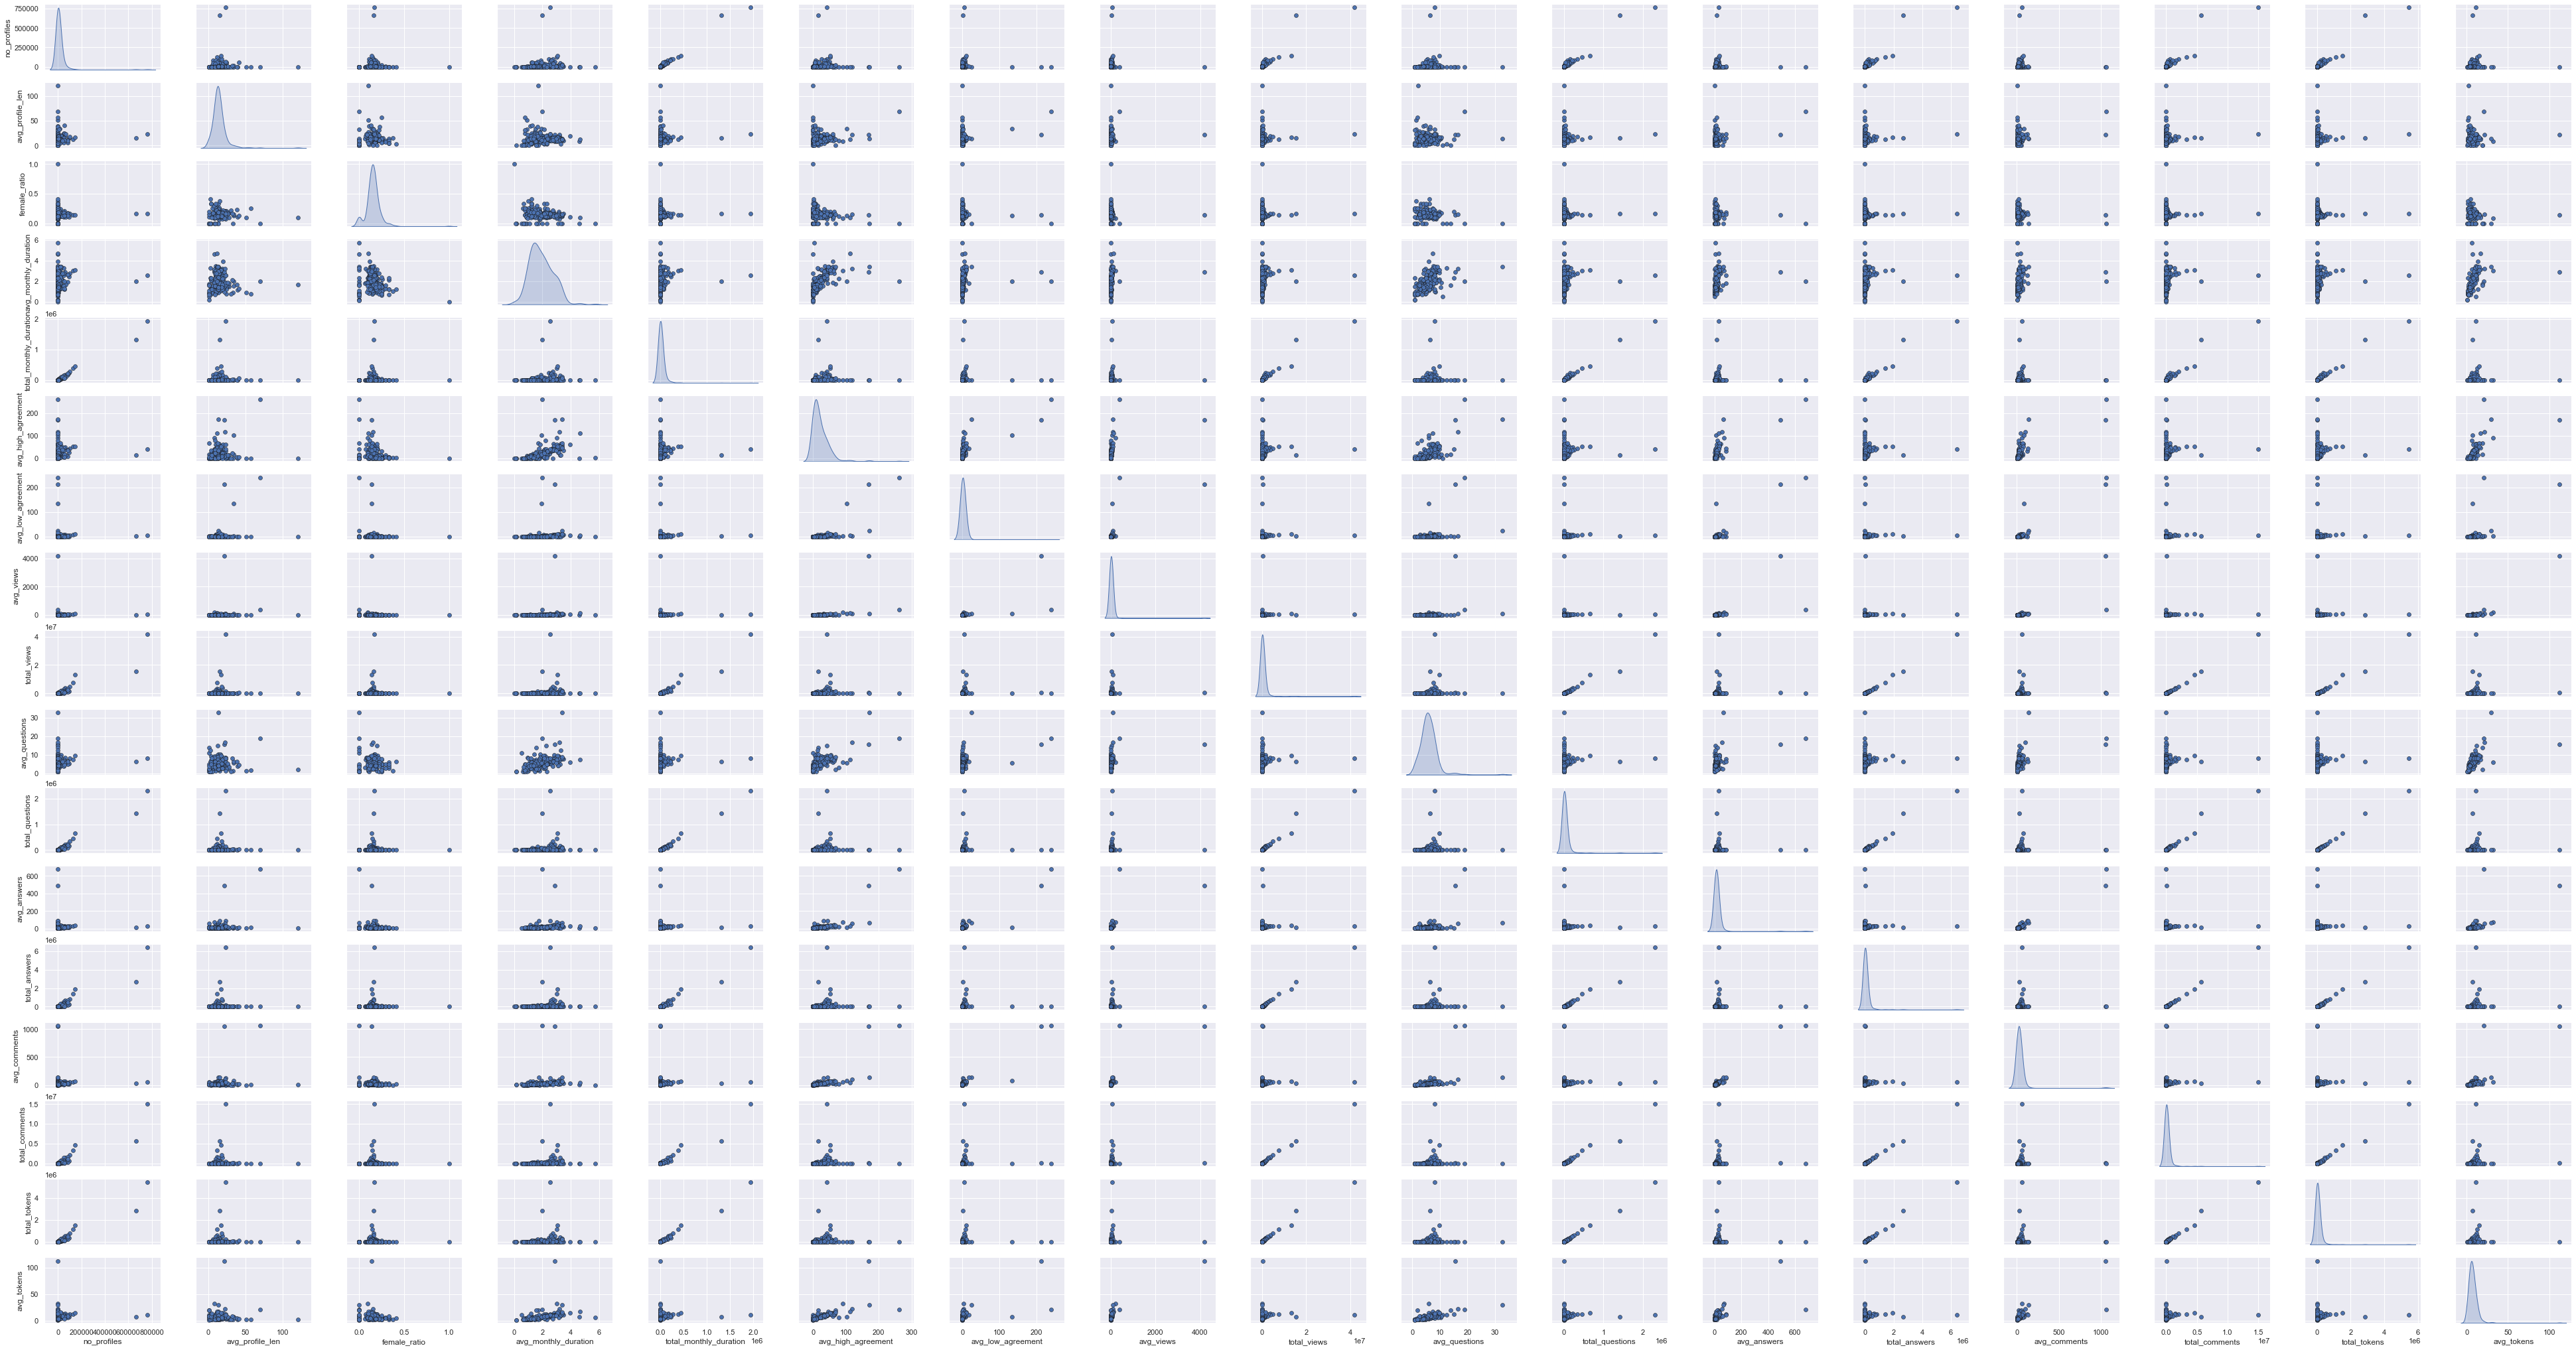

In [33]:
pp = sns.pairplot(df_con[[c for c in df_con.columns if "std" not in c]],size=1.8,aspect=1.8,
                  plot_kws=dict(edgecolor="k", 
                                linewidth= 0.5),diag_kind="kde",diag_kws=dict(shade=True))
fig= pp.fig
fig.subplots_adjust(top = 0.93,wspace= 0.3)

array([[<AxesSubplot:title={'center':'profile_length'}>,
        <AxesSubplot:title={'center':'activitymonthlyduration'}>,
        <AxesSubplot:title={'center':'highagreement'}>],
       [<AxesSubplot:title={'center':'lowagreement'}>,
        <AxesSubplot:title={'center':'views'}>,
        <AxesSubplot:title={'center':'fame'}>],
       [<AxesSubplot:title={'center':'questions'}>,
        <AxesSubplot:title={'center':'answers'}>,
        <AxesSubplot:title={'center':'comments'}>],
       [<AxesSubplot:title={'center':'edits'}>,
        <AxesSubplot:title={'center':'tokens'}>, <AxesSubplot:>]],
      dtype=object)

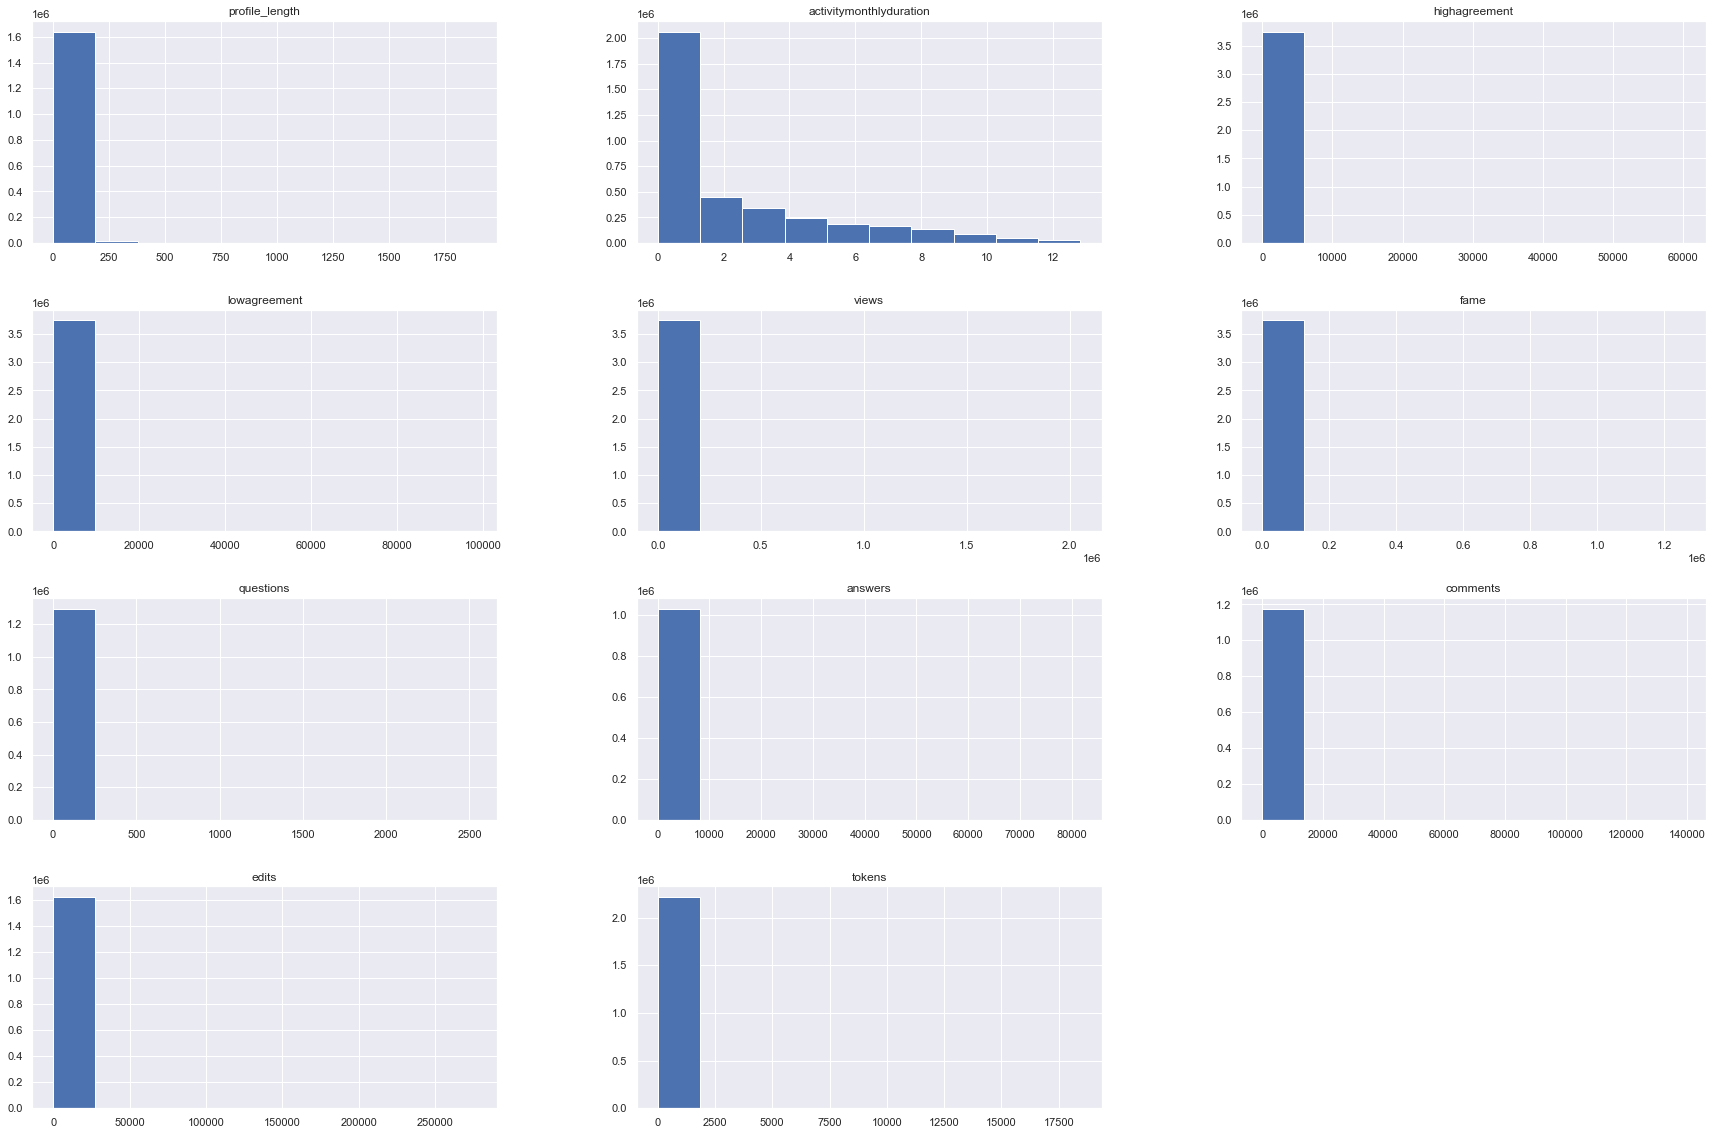

In [34]:
fig= plt.figure(figsize=(30, 20))
ax=fig.gca()
df[[c for c in df.columns if c not in ["id"]]].hist(ax=ax)

### Top 10 Country According to number of Profiles

In [35]:
top10_profiles = df_con.nlargest(10, columns="no_profiles")
top10_profiles

country  no_profiles  avg_profile_len  std_profile_len  \
231       United States       764753        23.513693        47.722215   
101               India       665163        15.334938        34.286083   
230      United Kingdom       146152        17.047999        35.282681   
81              Germany       127043        12.190189        28.152856   
38               Canada       101895        17.935566        37.561588   
29               Brazil        95968        15.738682        31.844407   
178  Russian Federation        85534        10.158152        27.482902   
74               France        85233        11.654702        26.660704   
43                China        85184         6.351542        18.219940   
164            Pakistan        66230        23.336646        42.898511   

     female_ratio  avg_monthly_duration  total_monthly_duration  \
231      0.165579              2.541795            1.943845e+06   
101      0.161683              1.979850            1.316923e+06   
230      0.142138              3.077608            4.497986e+05   
81       0.145972              3.013235            3.828104e+05   
38       0.159663              2.739922            2.791844e+05   
29       0.110105              2.464511            2.365142e+05   
178      0.127303              2.624697            2.245008e+05   
74       0.161203              2.602590            2.218265e+05   
43       0.179272              1.916073            1.632187e+05   
164      0.110764              1.673489            1.108352e+05   

     std_monthly_duration  avg_high_agreement  avg_low_agreement  avg_views  \
231              3.236877           41.232368           5.621483  54.634353   
101              2.479875           15.125969           1.532970  23.255450   
230              3.498050           53.076516          10.633895  90.801159   
81               3.203919           52.283794           9.207292  58.511819   
38               3.271658           42.780882           4.283223  46.395142   
29               2.790949           25.889005           1.188959  15.732442   
178              2.943769           34.604099           2.966832  29.288306   
74               2.969866           39.165323           6.173841  41.924900   
43               2.512813            8.853940           0.505189  12.572408   
164              2.306425           14.717047           0.966979  19.682213   

     total_views    std_views  avg_questions  std_questions  total_questions  \
231     41781785  1349.399916       8.244199      27.004877        2300692.0   
101     15468665   287.529861       6.346794      16.456788        1419746.0   
230     13270771  5560.893604       9.733665      28.200203         658901.0   
81       7433517   678.203328       7.609059      20.675506         448516.0   
38       4727433   460.961024       8.267233      24.348742         344322.0   
29       1509811   178.379776       5.448840      15.853201         154273.0   
178      2505146   326.329914       6.399185      23.330444         196295.0   
74       3573385   885.712287       6.827598      21.518593         248982.0   
43       1070968   729.829631       5.006376      15.488877          89514.0   
164      1303553   590.797130       6.055152      15.370724         125820.0   

     avg_answers  std_answers  total_answers  avg_comments  std_comments  \
231    28.545697   258.977829      6405112.0     57.600792    602.387333   
101    15.432923    93.728226      2657179.0     29.618308    178.104940   
230    35.783841   303.713109      1912038.0     72.226632    765.527601   
81     28.290503   163.569041      1411102.0     59.678735    450.476347   
38     24.636565   141.506017       821999.0     52.802175    499.483591   
29     10.601821    64.648963       270145.0     22.925763    175.673542   
178    18.392552   121.145917       480064.0     36.868486    342.951796   
74     23.311437   217.016658       708318.0     45.140227    451.261826   
43      9.401539    57.17825

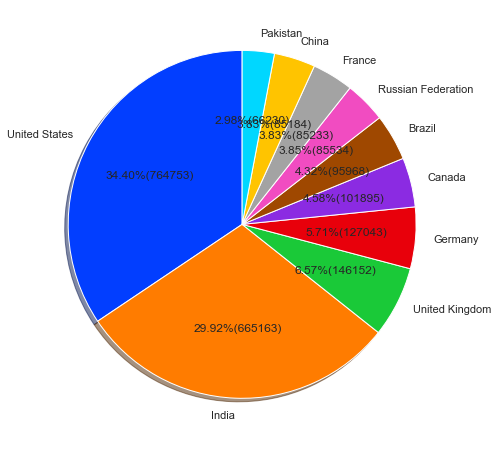

In [36]:
def absolute_value(val):
    a  = np.round(val/100.*top10_profiles.no_profiles.sum(), 0)
    return a.astype(int)

colors = sns.color_palette('bright')

#create pie chart
plt.pie(top10_profiles.no_profiles, labels = top10_profiles.country, colors = colors,startangle=90,shadow=True, autopct=
        lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*top10_profiles.no_profiles.sum()))
plt.show()

#### Interactive Plot

In [37]:
df_con.columns

Index(['country', 'no_profiles', 'avg_profile_len', 'std_profile_len',
       'female_ratio', 'avg_monthly_duration', 'total_monthly_duration',
       'std_monthly_duration', 'avg_high_agreement', 'avg_low_agreement',
       'avg_views', 'total_views', 'std_views', 'avg_questions',
       'std_questions', 'total_questions', 'avg_answers', 'std_answers',
       'total_answers', 'avg_comments', 'std_comments', 'total_comments',
       'total_tokens', 'avg_tokens', 'std_tokens'],
      dtype='object')

In [38]:

temp = df_con[['country', 'no_profiles', "female_ratio"]]
temp=df_con
temps = temp.nlargest(10, columns=['no_profiles'])
temps.reset_index(drop=True, inplace=True)

#bar box spread ratio heatmap surface histogram bubble bubble3d scatter3d scattergeo ohlc candle pie choroplet
temps.iplot(kind='pie',
            text="female_ratio" , labels='country', values='no_profiles', 
            title='Top 10 country based on number of profiles', hole = 0.5)

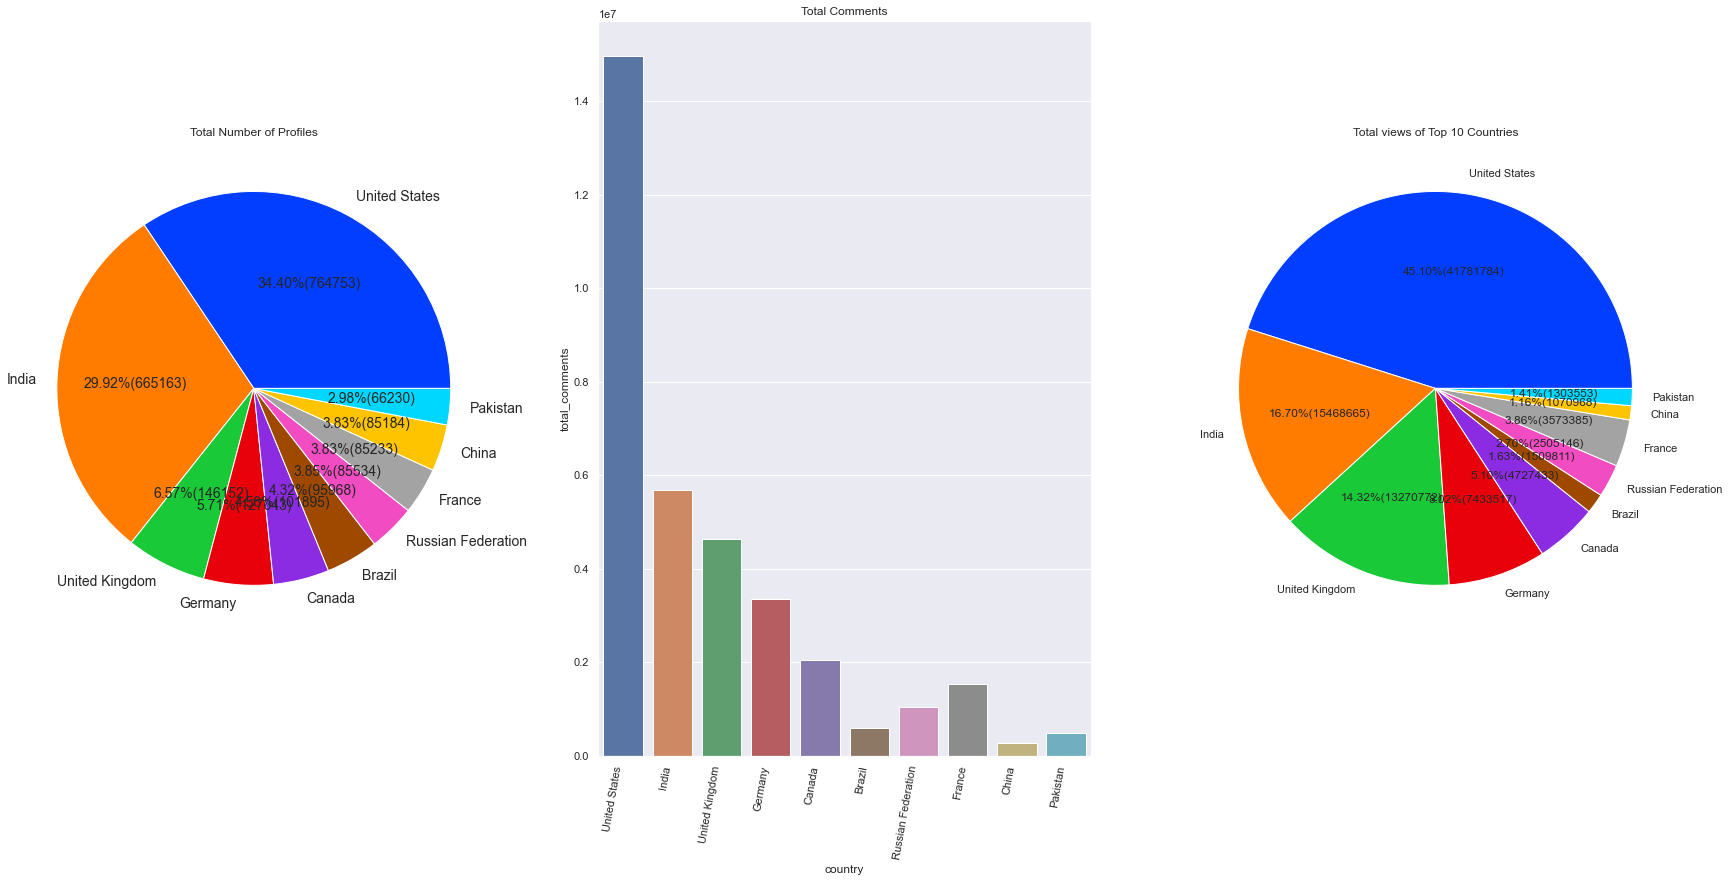

In [39]:
# fig=plt.figure( figsize=(30,10))
# axs = [fig.add_subplot(i) for i in [131, 132, 133]]# 
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(30,15))
# sns.set()
axs[0].pie(top10_profiles.no_profiles, labels = top10_profiles.country, colors = colors, textprops={'fontsize': 14}, autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*top10_profiles.no_profiles.sum()))
axs[0].set_title('Total Number of Profiles')
sns.barplot(data=top10_profiles, x="country", y="total_comments", ax=axs[1])
fig.autofmt_xdate(rotation=80)
axs[1].set_title('Total Comments')
axs[2].pie(top10_profiles.total_views, labels = top10_profiles.country, colors = colors, autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*top10_profiles.total_views.sum()))
axs[2].set_title('Total views of Top 10 Countries')
plt.show()

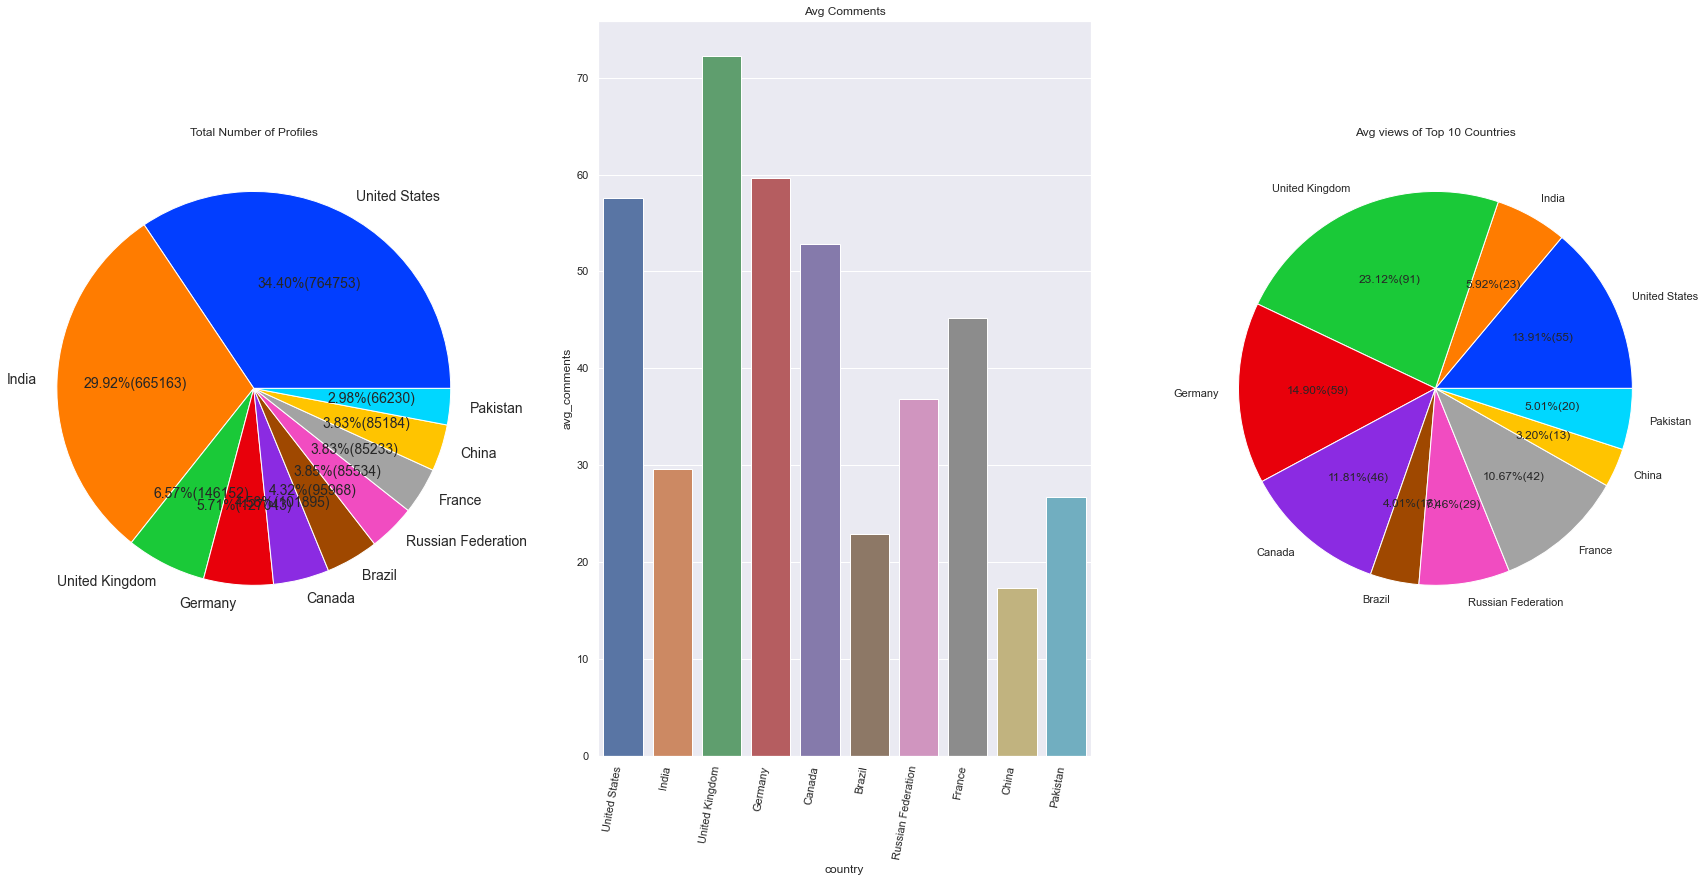

In [40]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(30,15))
# sns.set()
axs[0].pie(top10_profiles.no_profiles, labels = top10_profiles.country, colors = colors, textprops={'fontsize': 14}, autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*top10_profiles.no_profiles.sum()))
axs[0].set_title('Total Number of Profiles')
sns.barplot(data=top10_profiles, x="country", y="avg_comments", ax=axs[1])
fig.autofmt_xdate(rotation=80)
axs[1].set_title('Avg Comments')
axs[2].pie(top10_profiles.avg_views, labels = top10_profiles.country, colors = colors, autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*top10_profiles.avg_views.sum()))
axs[2].set_title('Avg views of Top 10 Countries')
plt.show()

### Top 10 Countries According to the Columns
Some countries have few profiles. Thus, only take top ten from those which have more profiles.

In [41]:
df_con.query("no_profiles>1000")

country  no_profiles  avg_profile_len  \
0                          Afghanistan         1695        11.750413   
1                              Albania         1338        15.770492   
2                              Algeria         8999        12.880404   
8                            Argentina        22907        14.600148   
9                              Armenia         2456        14.852136   
..                                 ...          ...              ...   
234                         Uzbekistan         2746         8.964789   
236  Venezuela, Bolivarian Republic of         6695        18.304078   
237                           Viet Nam        52598        41.045092   
243                             Zambia         1149        13.719101   
244                           Zimbabwe         2261        13.816807   

     std_profile_len  female_ratio  avg_monthly_duration  \
0          31.472981      0.132120              1.338478   
1          40.320642      0.243421              1.804656   
2          27.416959      0.185085              1.210008   
8          31.613494      0.133004              2.449470   
9          31.303919      0.148529              2.404475   
..               ...           ...                   ...   
234        23.733463      0.095325              1.532877   
236        35.475852      0.124407              1.433259   
237        62.410336      0.134766              1.268697   
243        21.623046      0.189119              1.190339   
244        26.168099      0.186522              1.394126   

     total_monthly_duration  std_monthly_duration  avg_high_agreement  \
0                   2268.72              1.912375           11.532153   
1                   2414.63              2.261245           11.335575   
2                  10888.86              1.804947           10.217913   
8                  56110.02              2.950819           23.445235   
9                   5905.39              2.660853           30.811889   
..                      ...                   ...                 ...   
234                 4209.28              2.134965           22.687546   
236                 9595.67              2.336680            9.433159   
237                66730.94              2.047644            6.548785   
243                 1367.70              1.904995            9.320279   
244                 3152.12              1.969983            3.060150   

     avg_low_agreement  avg_views  total_views   std_views  avg_questions  \
0             0.532153  11.776401        19961   54.836099       6.039666   
1             1.454410  20.439462        27348  134.247340       4.786842   
2             0.985332  10.758084        96812  142.697696       4.240872   
8             1.572663  19.591129       448774  166.192998       5.680399   
9             2.342427  34.498779        84729  284.211636       6.834499   
..                 ...        ...          ...         ...            ...   
234           0.446103  11.771668        32325   70.482521       4.781122   
236           0.837192   8.024795        53726  126.046966       5.354241   
237           0.363018   7.510019       395012  114.892329       4.730684   
243           0.153177   4.891210         5620   58.160922       4.246231   
244           0.218045   4.176913         9444   27.449771       4.134831   

     std_questions  total_questions  avg_answers  std_answers  total_answers  \
0        12.900832           2893.0    12.782313    26.802403         3758.0   
1         6.449670           1819.0    13.290323    36.926494         4120.0   
2         9.184246           8363.0    13.535018    74.707273        18746.0   
8        15.695752          39848.0    14.450704    59.422037        87210.0   
9        15.365424           5864.0    18.812500    64.209268        13846.0   
..             ...              ...          ...          ...            ...   
234       9.495275           3495.0    12.946274    53.488760         7470.0   
236

In [42]:
cdf = df_con.nlargest(100, columns=["no_profiles"])
cdf["country"] = cdf["country"]+ " (Profiles " + cdf.no_profiles.astype(str) + ")"
for c in [v for v in df_con.columns if v not in ["country", 'lon', 'lat', 'iso_con']]:
  temp = cdf[['country', c]]
  temps = temp.nlargest(10, columns=[c])
  temps.reset_index(drop=True, inplace=True)
  temps.iplot(kind='pie',labels='country',values=c, title=f'Top 10 country based on {c}', hole = 0.5)

#### Insights
* US have high number of profiles then India does.
* Average profile length is higher for Viet Nam but US falls below 3rd.
* Combodia have high proportion of females profiles (23%) than other countries. US and India doesnot fall under top 10.
* Average monthly duration is higher for Sweden an Czechia but US and India doesnot fall under top 10.
* Norway have high deviation on monthly duration which means that there is not a stable range of monthly duration. India and US doesnot fall under top 10.
* Average high agreement is highest for Switzerland. US and India doesnot fall under top 10.
* Average views is highest for UK, Switzerland but US and India doesnot fall under top 10.
* US have 43% views of total views.
* UK have most unstable views.
* Average question per profile seems to be higher for those from Israel. But US and India doesnot fall under top 10.
* Georgia seems to be having high deviation on questions per profile.
* Slovakia seems to be having highest average answers per profile then UK does.
* Slovakia seems to be having highest deviation on answers.
* Average comments seems to be highest for UK ans Switzerland.
* Highest deviation is seen on UK comments.

### Missing Values According to the Countries

Again viewing on top 100 countries according to no profiles.

In [43]:
# for c in df.columns:
nulldf = df.groupby('country').agg({c: lambda x: x.isnull().sum()/len(x) for c in df.columns if c!="country"}).reset_index().merge(df_con[["country", "no_profiles"]], on="country")
nulldf.sort_values("no_profiles", ascending=False)

country  id      city     state    gender  \
231                United States   0  0.219940  0.176108  0.166498   
101                        India   0  0.178344  0.177898  0.186186   
230               United Kingdom   0  0.182160  0.180996  0.144740   
81                       Germany   0  0.361350  0.362358  0.169415   
38                        Canada   0  0.220531  0.220178  0.166995   
..                           ...  ..       ...       ...       ...   
50                  Cook Islands   0  1.000000  1.000000  0.500000   
77   French Southern Territories   0  0.500000  1.000000  0.000000   
165                        Palau   0  1.000000  0.000000  0.000000   
240            Wallis and Futuna   0  1.000000  1.000000  1.000000   
197    Sint Maarten (Dutch part)   0  0.000000  1.000000  0.000000   

     profile_length  activitymonthlyduration  highagreement  lowagreement  \
231        0.504460                      0.0              0             0   
101        0.583003                      0.0              0             0   
230        0.453179                      0.0              0             0   
81         0.457499                      0.0              0             0   
38         0.504686                      0.0              0             0   
..              ...                      ...            ...           ...   
50         1.000000                      0.0              0             0   
77         0.000000                      0.0              0             0   
165        1.000000                      0.0              0             0   
240        1.000000                      0.0              0             0   
197        1.000000                      0.0              0             0   

     views  fame  questions   answers  comments     edits    tokens  \
231      0     0   0.635087  0.706597  0.660273  0.546940  0.371900   
101      0     0   0.663699  0.741152  0.711675  0.581624  0.420849   
230      0     0   0.536832  0.634401  0.559999  0.443908  0.305969   
81       0     0   0.536023  0.607385  0.559322  0.426730  0.300276   
38       0     0   0.591256  0.672555  0.620933  0.497375  0.351843   
..     ...   ...        ...       ...       ...       ...       ...   
50       0     0   1.000000  1.000000  1.000000  1.000000  1.000000   
77       0     0   0.500000  0.500000  0.500000  0.500000  0.000000   
165      0     0   1.000000  1.000000  1.000000  1.000000  1.000000   
240      0     0   1.000000  1.000000  1.000000  1.000000  1.000000   
197      0     0   1.000000  0.000000  0.000000  0.000000  0.000000   

     no_profiles  
231       764753  
101       665163  
230       146152  
81        127043  
38        101895  
..           ...  
50             2  
77             2  
165            1  
240            1  
197            1  

[245 rows x 17 columns]

In [44]:
# for c in df.columns:
# nulldf = df.groupby('country').agg({c: lambda x: x.isnull().sum()/len(x) for c in df.columns if c!="country"}).reset_index().merge(df_con[["country", "no_profiles"]], on="country")
# nulldf.sort_values("no_profiles", ascending=False)

cdf = nulldf.nlargest(100, columns=["no_profiles"])
cdf["country"] = cdf["country"]+ " (Profiles " + cdf.no_profiles.astype(str) + ")"
for c in [v for v in cdf.columns if v not in ["id", "no_profiles", "country", 'lon', 'lat', 'iso_con']]:
  temp = cdf[['country', c]]
  temps = temp.nlargest(10, columns=[c])
  temps.reset_index(drop=True, inplace=True)
  temps.iplot(kind='pie',labels='country',values=c, title=f'Top 10 country missing {c}', hole = 0.5)

#### Insights
I assume missing values is not a error in data but it could be that a profile person has not used that activity.

### Plots based on Countries Maps

#### Prepare Latitude and Longitude for a country

There is not a easy way to get coordinates and using geopy also fails after few requests. Get coordinates for country. 

But I have prepared a csv after doing below step and stored it in GitHub so now reading that instead.

In [45]:
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent='myapplication')

# clan = {}
# for c in df_con.country.unique():
#   t= geolocator.geocode(c, timeout=100000)
#   clan[c] = ("","")
#   if t is not None:
#     clan[c] = (t.longitude, t.latitude)
# clan

In [46]:
# geolocator.geocode("Va", timeout=100000)

In [47]:
# these coordinates were hard to find, set them manually
# clan["Virgin Islands, British"] = (-64.5661642, 18.4024)
# clan["Taiwan, Province of China"] = (120.9820179, 23.9739374)

# df_con["lon"] = df_con.country.apply(lambda x: clan[x][0])
# df_con["lat"] = df_con.country.apply(lambda x: clan[x][1])

In [48]:
cldf = pd.read_csv("https://github.com/q-viper/State-Location-Coordinates/raw/main/world_country.csv")
cldf = cldf[["country", "lon", "lat", "iso_con"]]
cldf

country         lon        lat iso_con
0          Afghanistan   66.238514  33.768006     AFG
1              Albania   19.999962  41.000028     ALB
2              Algeria    2.999983  28.000027     DZA
3       American Samoa -170.692511 -14.289304     ASM
4              Andorra    1.573203  42.540717     AND
..                 ...         ...        ...     ...
240  Wallis and Futuna -176.204224 -13.289402     WLF
241     Western Sahara  -13.892143  24.168196     ESH
242              Yemen   47.891527  16.347124     YEM
243             Zambia   27.558988 -14.518912     ZMB
244           Zimbabwe   29.746841 -18.455496     ZWE

[245 rows x 4 columns]

In [49]:
df_con = df_con.merge(cldf, on="country")
df_con

country  no_profiles  avg_profile_len  std_profile_len  \
0          Afghanistan         1695        11.750413        31.472981   
1              Albania         1338        15.770492        40.320642   
2              Algeria         8999        12.880404        27.416959   
3       American Samoa           50         9.533333        14.574276   
4              Andorra          103        23.448980        49.687801   
..                 ...          ...              ...              ...   
240  Wallis and Futuna            1              NaN              NaN   
241     Western Sahara           14         9.750000        14.361407   
242              Yemen          995        12.871795        48.533362   
243             Zambia         1149        13.719101        21.623046   
244           Zimbabwe         2261        13.816807        26.168099   

     female_ratio  avg_monthly_duration  total_monthly_duration  \
0        0.132120              1.338478                 2268.72   
1        0.243421              1.804656                 2414.63   
2        0.185085              1.210008                10888.86   
3        0.179487              1.208000                   60.40   
4        0.182927              2.546408                  262.28   
..            ...                   ...                     ...   
240      0.000000              0.090000                    0.09   
241      0.000000              0.695000                    9.73   
242      0.121387              1.216794                 1210.71   
243      0.189119              1.190339                 1367.70   
244      0.186522              1.394126                 3152.12   

     std_monthly_duration  avg_high_agreement  avg_low_agreement  avg_views  \
0                1.912375           11.532153           0.532153  11.776401   
1                2.261245           11.335575           1.454410  20.439462   
2                1.804947           10.217913           0.985332  10.758084   
3                2.095799            0.600000           0.000000   3.220000   
4                2.933439           31.417476           1.058252  77.291262   
..                    ...                 ...                ...        ...   
240                   NaN            0.000000           0.000000   0.000000   
241              1.165377            1.214286           0.000000   1.571429   
242              1.904603            9.305528           0.253266   7.074372   
243              1.904995            9.320279           0.153177   4.891210   
244              1.969983            3.060150           0.218045   4.176913   

     total_views   std_views  avg_questions  std_questions  total_questions  \
0          19961   54.836099       6.039666      12.900832           2893.0   
1          27348  134.247340       4.786842       6.449670           1819.0   
2          96812  142.697696       4.240872       9.184246           8363.0   
3            161    8.212211       3.166667       2.757909             38.0   
4           7961  425.226944       7.833333      10.672318            329.0   
..           ...         ...            ...            ...              ...   
240            0         NaN            NaN            NaN              0.0   
241           22    3.030976       3.500000       0.707107              7.0   
242         7039   31.099252       4.203704       8.173422            908.0   
243         5620   58.160922       4.246231       8.580850            845.0   
244         9444   27.449771       4.134831      11.082198           1840.0   

     avg_answers  std_answers  total_answers  avg_comments  std_comments  \
0      12.782313    26.802403         3758.0     24.606299     67.023895   
1      13.290323    36.926494         4120.0     24.562842     63.996876   
2      13.535018    74.707273        18746.0     24.412938    160.340467   
3       1.750000     0.957427            7.0      6.222222      7.838651   
4      84.000000   368.670507         3024.0    125.659

#### Country Wise Profiles (Desnsity Map)

Hover over the country to see the values.

In [50]:

fig = px.density_mapbox(df_con[~(df_con.lat=="")], 
                        lat="lat", 
                        lon="lon", 
                        hover_name="country", 
                        hover_data=["no_profiles"], 
                        color_continuous_scale="Portland",
                        z = "no_profiles",
                        radius=100, 
                        zoom=0,
                        height=700)
fig.update_layout(title='Number of Profile Based on Country',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0) # stamen-terrain
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

##### Using density Mapbox

In [51]:
fig = px.density_mapbox(df_con[~(df_con.lat=="")], 
                        lat="lat", 
                        lon="lon", 
                        hover_name="country", 
                        z="no_profiles",
                        hover_data=["no_profiles"], 
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=0,
                        height=700)
fig.update_layout(title='Country vs Profiles',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

In [52]:
import plotly.graph_objects as go

d = df_con[~(df_con.lat=="")]
fig = go.Figure(go.Densitymapbox(lat=d.lat, lon=d.lon, z=d.no_profiles,hovertext=d.country,
                                 radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Country vs Profiles vs Views

First extract the iso code of each country using pycountry.

In each plot, a extra value is appended on the right of country name to add more information.

No need to research iso_con as it is already mapped.

In [53]:

# try:
#   import pycountry
# except:
#   !pip install pycountry
#   import pycountry
  
# def iso_name(x):
#   res = pycountry.countries.search_fuzzy(x)
#   if len(res)>0:
#     return res[0].alpha_3
# df_con["iso_con"] = df_con.country.apply(iso_name) 

In [54]:

fig = go.Figure(data=go.Choropleth(
    locations = df_con['iso_con'],
    z = df_con['no_profiles'],
    text = df_con['country'] + " " + df_con["total_views"].astype(str),
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    # colorbar_tickprefix = '$',
    colorbar_title = 'Number of Profiles',
))

fig.update_layout(
    title_text='Number of Profiles vs Country vs Total Views',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

#### Average Profile length vs Country vs Number of Profiles

In [55]:

fig = go.Figure(data=go.Choropleth(
    locations = df_con['iso_con'],
    z = df_con['avg_profile_len'],
    text = df_con['country'] + " " + df_con["no_profiles"].astype(str),
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    # colorbar_tickprefix = '$',
    colorbar_title = 'Average Profile Length',
))

fig.update_layout(
    title_text='Average Profile Length vs Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

* Average profile length seems to be high for 

#### female_ratio vs country

In [56]:

fig = go.Figure(data=go.Choropleth(
    locations = df_con['iso_con'],
    z = df_con['female_ratio'],
    text = df_con['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'female_ratio',
))

fig.update_layout(
    title_text='female_ratio vs Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

#### avg_monthly_duration vs country

In [57]:
fig = go.Figure(data=go.Choropleth(
    locations = df_con['iso_con'],
    z = df_con['avg_monthly_duration'],
    text = df_con['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    # colorbar_tickprefix = '$',
    colorbar_title = 'avg_monthly_duration',
))

fig.update_layout(
    title_text='avg_monthly_duration vs Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

#### total_monthly_duration

In [58]:
fig = go.Figure(data=go.Choropleth(
    locations = df_con['iso_con'],
    z = df_con['total_monthly_duration'],
    text = df_con['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    # colorbar_tickprefix = '$',
    colorbar_title = 'total_monthly_duration',
))

fig.update_layout(
    title_text='total_monthly_duration vs Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

#### Avg Profile Length vs Country

In [59]:

fig = go.Figure(data=go.Choropleth(
    locations = df_con['iso_con'],
    z = df_con['avg_profile_len'],
    text = df_con['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    # colorbar_tickprefix = '$',
    colorbar_title = 'avg_profile_len',
))

fig.update_layout(
    title_text='avg_profile_len vs Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

## EDA According to the State

### Aggregated DF

In [60]:
def value_counts(x):
  """
    Returns ratio of females. 
  """
  v = x.value_counts(normalize=True).rename("gratio").reset_index().sort_values("index")
  fr = v.query("index=='female'")["gratio"]

  if len(fr)>0:
    return fr
  else:
    return 0

df_st = df.groupby("state").aggregate(
    no_profiles=("id", "count"),
    avg_profile_len = ("profile_length", "mean"),
    std_profile_len = ("profile_length", "std"),
    female_ratio = ("gender", value_counts),
    avg_monthly_duration = ("activitymonthlyduration", "mean"),
    total_monthly_duration = ("activitymonthlyduration", "sum"),
    std_monthly_duration = ("activitymonthlyduration", "std"),
    avg_high_agreement = ("highagreement", "mean"),
    avg_low_agreement = ("lowagreement", "mean"),
    avg_views = ("views", "mean"),
    total_views = ("views", "sum"),
    std_views = ("views", "std"),
    avg_questions = ("questions", "mean"),
    std_questions = ("questions", "std"),
    total_questions = ("questions", "sum"),
    avg_answers = ("answers", "mean"),
    std_answers = ("answers", "std"),
    total_answers = ("answers", "sum"),
    avg_comments = ("comments", "mean"),
    std_comments = ("comments", "std"),
    total_comments = ("comments", "sum"),
    total_tokens = ("tokens", "sum"),
    avg_tokens = ("tokens", "mean"),
    std_tokens = ("tokens", "std")
    ).reset_index()


df_st

state  no_profiles  avg_profile_len  std_profile_len  \
0      'Asir Region           16         1.800000         1.788854   
1             AT.17            1              NaN              NaN   
2            Aakkâr            2              NaN              NaN   
3            Aargau          256        11.306569        16.533639   
4              Abia          116        25.290323        30.137677   
...             ...          ...              ...              ...   
3067  Žilinský kraj          237        11.484536        23.497391   
3068           Žiri            2         1.000000              NaN   
3069      Žirovnica            1              NaN              NaN   
3070      Žužemberk            1        27.000000              NaN   
3071         Ḩajjah            2         2.000000         1.414214   

      female_ratio  avg_monthly_duration  total_monthly_duration  \
0         0.090909              1.375625                   22.01   
1         1.000000              3.750000                    3.75   
2         0.000000              1.050000                    2.10   
3         0.106195              2.994102                  766.49   
4         0.148649              1.063793                  123.40   
...            ...                   ...                     ...   
3067      0.086294              2.783249                  659.63   
3068      0.000000              1.905000                    3.81   
3069      0.000000              0.820000                    0.82   
3070      0.000000              0.620000                    0.62   
3071      0.000000              1.270000                    2.54   

      std_monthly_duration  avg_high_agreement  avg_low_agreement  avg_views  \
0                 1.990310            0.000000           0.000000   0.562500   
1                      NaN           11.000000           0.000000  20.000000   
2                 1.456640            0.000000           0.000000   1.500000   
3                 3.108902           58.175781           4.496094  56.804688   
4                 1.577556           22.241379           0.068966   4.405172   
...                    ...                 ...                ...        ...   
3067              2.930907           56.873418           1.789030  20.970464   
3068              1.859691            3.000000           0.000000   8.000000   
3069                   NaN            0.000000           0.000000   1.000000   
3070                   NaN           22.000000           0.000000  16.000000   
3071              1.004092            0.000000           0.000000   2.500000   

      total_views   std_views  avg_questions  std_questions  total_questions  \
0               9    1.209339       1.000000       0.000000              2.0   
1              20         NaN      14.000000            NaN             14.0   
2               3    2.121320            NaN            NaN              0.0   
3           14542  249.725200      11.626168      25.292076           1244.0   
4             511   22.314347       4.826087       9.749835            111.0   
...           ...         ...            ...            ...              ...   
3067         4970   76.014517       7.320000      14.547644            732.0   
3068           16   11.313708       6.000000            NaN              6.0   
3069            1         NaN            NaN            NaN              0.0   
3070           16         NaN       3.000000            NaN              3.0   
3071            5    0.707107       1.000000            NaN              1.0   

      avg_answers  std_answers  total_answers  avg_comments  std_comments  \
0        1.000000          NaN            1.0           NaN           NaN   
1       16.000000          NaN           16.0     23.000000           NaN   
2             NaN          NaN            0.0           NaN           NaN   
3       29.326531    68.859153         2874.0     51.235294     96.446381   
4        5.000000     8.865001           90.0    

### Top 10 States Missing Columns

In [61]:
# for c in df.columns:
nulldf = df.groupby('state').agg({c: lambda x: x.isnull().sum()/len(x) for c in df.columns if c!="state"}).reset_index().merge(df_st[["state", "no_profiles"]], on="state")
nulldf.sort_values("no_profiles", ascending=False)

cdf = nulldf.nlargest(100, columns=["no_profiles"])
cdf["state"] = cdf["state"]+ " (Profiles " + cdf.no_profiles.astype(str) + ")"
for c in [v for v in cdf.columns if v not in ["id", "no_profiles", "state", 'lon', 'lat', 'iso_con']]:
  temp = cdf[['state', c]]
  temps = temp.nlargest(10, columns=[c])
  temps.reset_index(drop=True, inplace=True)
  temps.iplot(kind='pie',labels='state',values=c, title=f'Top 10 state missing {c}', hole = 0.5)

### Top 10 States According to Columns
Use only states that have profiles more than 10000. 

> Values in the () after state name is the number of profiles.

In [62]:
tdf = df_st.query("no_profiles>10000")
tdf["state"] = tdf["state"] + " (" + tdf["no_profiles"].astype(str) + ")"

for  c in [c for c in df_st.columns if c not in ["state"]]:
  
  tdf.nlargest(10, c).iplot(kind="pie", 
                            labels="state",
                            values=c,
                            theme="polar",
                            barmode="overlay",
                            # xTitle="State", yTitle=c, 
                            title=f"Top 10 State according to {c}")

In [63]:
for  c in [c for c in df_st.columns if c not in ["state"]]: 
  print(f"* Top 3 States according to {c} are {' '.join(tdf.nlargest(3, c)['state'].tolist())}")

* Top 3 States according to no_profiles are California (115892) Karnataka (112768) England (102488)
* Top 3 States according to avg_profile_len are Ho Chi Minh (10703) Florida (30339) Punjab (32357)
* Top 3 States according to std_profile_len are Ho Chi Minh (10703) New York (58846) Florida (30339)
* Top 3 States according to female_ratio are SG.01 (18567) Kerala (20018) Beijing (11735)
* Top 3 States according to avg_monthly_duration are Berlin (18335) Washington (27479) North Holland (10337)
* Top 3 States according to total_monthly_duration are California (115892) England (102488) Karnataka (112768)
* Top 3 States according to std_monthly_duration are Washington (27479) Oregon (11734) Berlin (18335)
* Top 3 States according to avg_high_agreement are Berlin (18335) Washington (27479) Utah (10279)
* Top 3 States according to avg_low_agreement are Bavaria (15330) England (102488) Missouri (10145)
* Top 3 States according to avg_views are Washington (27479) England (102488) Berlin (1833

#### Insights
* Top 3 States according to no_profiles are California (115892) Karnataka (112768) England (102488)
* Top 3 States according to avg_profile_len are Ho Chi Minh (10703) Florida (30339) Punjab (32357)
* Top 3 States according to std_profile_len are Ho Chi Minh (10703) New York (58846) Florida (30339)
* Top 3 States according to female_ratio are SG.01 (18567) Kerala (20018) Beijing (11735)
* Top 3 States according to avg_monthly_duration are Berlin (18335) Washington (27479) North Holland (10337)
* Top 3 States according to total_monthly_duration are California (115892) England (102488) Karnataka (112768)
* Top 3 States according to std_monthly_duration are Washington (27479) Oregon (11734) Berlin (18335)
* Top 3 States according to avg_high_agreement are Berlin (18335) Washington (27479) Utah (10279)
* Top 3 States according to avg_low_agreement are Bavaria (15330) England (102488) Missouri (10145)
* Top 3 States according to avg_views are Washington (27479) England (102488) Berlin (18335)
* Top 3 States according to total_views are England (102488) California (115892) New York (58846)
* Top 3 States according to std_views are England (102488) Washington (27479) California (115892)
* Top 3 States according to avg_questions are Victoria (14513) England (102488) Berlin (18335)
* Top 3 States according to std_questions are Victoria (14513) California (115892) British Columbia (13174)
* Top 3 States according to total_questions are England (102488) California (115892) Karnataka (112768)
* Top 3 States according to avg_answers are Washington (27479) England (102488) New Jersey (13174)
* Top 3 States according to std_answers are New York (58846) Massachusetts (21997) Pennsylvania (18398)
* Top 3 States according to total_answers are England (102488) California (115892) New York (58846)
* Top 3 States according to avg_comments are Massachusetts (21997) England (102488) Washington (27479)
* Top 3 States according to std_comments are Massachusetts (21997) Mazovia (10415) England (102488)
* Top 3 States according to total_comments are England (102488) California (115892) New York (58846)
* Top 3 States according to total_tokens are England (102488) California (115892) Karnataka (112768)
* Top 3 States according to avg_tokens are Berlin (18335) Washington (27479) England (102488)
* Top 3 States according to std_tokens are England (102488) Pennsylvania (18398) New Jersey (13174)

### Longitude/Latitude of State
Again, no need to scrape manually because I have already prepared it on GitHub.

In [64]:
sldf = pd.read_csv("https://github.com/q-viper/State-Location-Coordinates/raw/main/world_states.csv")
sldf = sldf[["country", "state", "lat", "lon"]]
sldf

country               state        lat         lon
0                 Poland  Kujawsko-Pomorskie  53.322002   18.339294
1          United States                Ohio  40.225357  -82.688140
2                 France       Île-de-France  48.400299    7.325679
3          United States      North Carolina  35.672964  -79.039292
4          United States            Colorado  38.725178 -105.607716
...                  ...                 ...        ...         ...
3062            Slovenia            Križevci        NaN         NaN
3063              Turkey               Iğdır  -2.134190  -79.900510
3064               Ghana       Western North  41.916013  -87.687082
3065            Paraguay             Caazapá        NaN         NaN
3066  Korea, Republic of      P'yŏngan-bukto        NaN         NaN

[3067 rows x 4 columns]

In [65]:
df_st[~df_st.state.isin(sldf.state)]

state  no_profiles  avg_profile_len  std_profile_len  female_ratio  \
1386       LY.49            1              NaN              NaN      0.000000   
2112  Province 2           68         9.857143        11.394041      0.000000   
2249       SG.02           17         3.888889         5.819030      0.285714   
2250       SG.03           23       101.750000       196.840672      0.000000   
2251       SG.04            5        37.000000              NaN      0.000000   
2252       SG.05            2         9.000000              NaN      0.500000   

      avg_monthly_duration  total_monthly_duration  std_monthly_duration  \
1386              0.000000                    0.00                   NaN   
2112              0.557500                   37.91              1.055150   
2249              2.622941                   44.59              3.499632   
2250              1.136957                   26.15              1.608888   
2251              1.548000                    7.74              2.663225   
2252              2.895000                    5.79              3.698168   

      avg_high_agreement  avg_low_agreement  avg_views  total_views  \
1386            0.000000           0.000000   0.000000            0   
2112           13.470588           0.470588   8.220588          559   
2249            9.352941           0.294118  26.941176          458   
2250            0.217391           0.000000   1.913043           44   
2251            6.000000           0.600000   9.400000           47   
2252           12.000000           2.000000  69.500000          139   

      std_views  avg_questions  std_questions  total_questions  avg_answers  \
1386        NaN            NaN            NaN              0.0          NaN   
2112  52.063923       2.777778       3.172595             50.0    17.166667   
2249  89.172915      15.333333      29.289361             92.0     3.200000   
2250   3.836583       1.857143       1.864454             13.0     2.500000   
2251  20.464604       4.000000            NaN              4.0    16.000000   
2252  94.045202       3.000000            NaN              3.0    99.000000   

      std_answers  total_answers  avg_comments  std_comments  total_comments  \
1386          NaN            0.0           NaN           NaN             0.0   
2112    31.555771          103.0     38.888889     97.059833           350.0   
2249     2.774887           16.0     22.833333     43.988256           137.0   
2250     3.000000           10.0      5.000000      6.244998            25.0   
2251          NaN           16.0     11.000000           NaN            11.0   
2252          NaN           99.0    119.000000           NaN           119.0   

      total_tokens  avg_tokens  std_tokens  
1386           0.0         NaN         NaN  
2112          98.0    4.083333    6.191977  
2249         112.0   11.200000   24.330137  
2250          23.0    2.555556    2.185813  
2251          27.0    9.000000   13.000000  
2252          14.0    7.000000    8.485281

In [66]:
mdf_st = df_st.merge(sldf, on="state")
mdf_st

state  no_profiles  avg_profile_len  std_profile_len  \
0      'Asir Region           16         1.800000         1.788854   
1             AT.17            1              NaN              NaN   
2            Aakkâr            2              NaN              NaN   
3            Aargau          256        11.306569        16.533639   
4              Abia          116        25.290323        30.137677   
...             ...          ...              ...              ...   
3061  Žilinský kraj          237        11.484536        23.497391   
3062           Žiri            2         1.000000              NaN   
3063      Žirovnica            1              NaN              NaN   
3064      Žužemberk            1        27.000000              NaN   
3065         Ḩajjah            2         2.000000         1.414214   

      female_ratio  avg_monthly_duration  total_monthly_duration  \
0         0.090909              1.375625                   22.01   
1         1.000000              3.750000                    3.75   
2         0.000000              1.050000                    2.10   
3         0.106195              2.994102                  766.49   
4         0.148649              1.063793                  123.40   
...            ...                   ...                     ...   
3061      0.086294              2.783249                  659.63   
3062      0.000000              1.905000                    3.81   
3063      0.000000              0.820000                    0.82   
3064      0.000000              0.620000                    0.62   
3065      0.000000              1.270000                    2.54   

      std_monthly_duration  avg_high_agreement  avg_low_agreement  avg_views  \
0                 1.990310            0.000000           0.000000   0.562500   
1                      NaN           11.000000           0.000000  20.000000   
2                 1.456640            0.000000           0.000000   1.500000   
3                 3.108902           58.175781           4.496094  56.804688   
4                 1.577556           22.241379           0.068966   4.405172   
...                    ...                 ...                ...        ...   
3061              2.930907           56.873418           1.789030  20.970464   
3062              1.859691            3.000000           0.000000   8.000000   
3063                   NaN            0.000000           0.000000   1.000000   
3064                   NaN           22.000000           0.000000  16.000000   
3065              1.004092            0.000000           0.000000   2.500000   

      total_views   std_views  avg_questions  std_questions  total_questions  \
0               9    1.209339       1.000000       0.000000              2.0   
1              20         NaN      14.000000            NaN             14.0   
2               3    2.121320            NaN            NaN              0.0   
3           14542  249.725200      11.626168      25.292076           1244.0   
4             511   22.314347       4.826087       9.749835            111.0   
...           ...         ...            ...            ...              ...   
3061         4970   76.014517       7.320000      14.547644            732.0   
3062           16   11.313708       6.000000            NaN              6.0   
3063            1         NaN            NaN            NaN              0.0   
3064           16         NaN       3.000000            NaN              3.0   
3065            5    0.707107       1.000000            NaN              1.0   

      avg_answers  std_answers  total_answers  avg_comments  std_comments  \
0        1.000000          NaN            1.0           NaN           NaN   
1       16.000000          NaN           16.0     23.000000           NaN   
2             NaN          NaN            0.0           NaN           NaN   
3       29.326531    68.859153         2874.0     51.235294     96.446381   
4        5.000000     8.865001           90.0    

### State Map Plots

In [67]:
for c in mdf_st.columns:
  if c in ["state", "lon", "lat", "country", "iso_con", "mstate"]:
    continue
  fig = px.density_mapbox(mdf_st[~mdf_st.lat.isna()], 
                          lat="lat", 
                          lon="lon", 
                          hover_name="state", 
                          hover_data=[c, "no_profiles"], 
                          z=c,
                          color_continuous_scale="Portland",
                          radius=7, 
                          zoom=0,
                          height=700)
  fig.update_layout(title=f'State vs {c}',
                    font=dict(family="Courier New, monospace",
                              size=18,
                              color="#7f7f7f")
                  )
  fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
  # fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

  fig.show()
  print("\n")
  # break


## References
1. https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb
2. https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-sberbank
3. https://www.kaggle.com/nitindatta/fifa-in-depth-analysis-with-linear-regression
4. https://www.kaggle.com/codename007/a-very-extensive-kiva-exploratory-analysis
5. https://www.kaggle.com/khoongweihao/covid-19-novel-coronavirus-eda-forecasting-cases
6. https://www.kaggle.com/parulpandey/wuhan-coronavirus-a-geographical-analysis
7. https://www.kaggle.com/dwin183287/kagglers-seen-by-continents
8. https://www.kaggle.com/beyondbeneath/geolocation-visualisations
9. https://www.kaggle.com/andresionek/geospatial-analysis-of-brazilian-e-commerce
10. https://www.kaggle.com/sudalairajkumar/where-do-people-learn-ml-ds
11. https://www.kaggle.com/dimarudov/data-analysis-using-sql
12. https://www.kaggle.com/artgor/eda-and-models
13. https://www.kaggle.com/dgawlik/house-prices-eda
14. https://www.kaggle.com/kabure/exploring-the-consumer-patterns-ml-pipeline
15. https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation
16. https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic
17. https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
18. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook
19. https://www.kaggle.com/samuelcortinhas/tps-jan-22-eda-modelling
20. https://www.kaggle.com/moonica/storytelling-with-data-exploratory-data-analysis
21. https://www.kaggle.com/rushabhnisher123/exploratory-data-analysis-countries-of-the-world/notebook
22. https://www.kaggle.com/sharmamanali/exploratory-data-analysis-countries-of-the-world
23. https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python/notebook
24). https://www.kaggle.com/spscientist/a-simple-tutorial-on-exploratory-data-analysis/notebook
25. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
26. https://www.kaggle.com/imoore/intro-to-exploratory-data-analysis-eda-in-python
27. https://www.kaggle.com/arthurtok/exploratory-data-analysis-visualisation
28. https://www.kaggle.com/prakharrathi25/exploratory-data-analysis-step-by-step
29. https://towardsdatascience.com/exploratory-data-analysis-of-kaggle-datasets-9a293886f644
30. https://github.com/braindotai/Kaggle-Exploratory-Data-Analysis